In [ ]:
# load libraries
import os
import numpy as np
import pandas as pd
from collections import defaultdict
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches

In [ ]:
# set style matplotlib
plt.style.use('ggplot')

In [ ]:
# move to dataset_final directory
%cd /content/drive/MyDrive/dataset_final

/content/drive/MyDrive/dataset_final


In [ ]:
# check current file in this directory
!ls

AIOSentiment.xlsx  metrics  metrics_tf	progress


In [ ]:
# check in metrics folder
!ls metrics

metrics_1.xlsx	metrics_4.xlsx	metrics_tf_bnb_ssa.xlsx  metrics_time.xlsx
metrics_2.xlsx	metrics_5.xlsx	metrics_tf_knn_ssa.xlsx
metrics_3.xlsx	metrics_6.xlsx	metrics_tf_svm_ssa.xlsx


In [ ]:
# read general metrics data
data_1 = pd.read_excel("metrics/metrics_1.xlsx")
data_2 = pd.read_excel("metrics/metrics_2.xlsx")
data_3 = pd.read_excel("metrics/metrics_3.xlsx")
data_4 = pd.read_excel("metrics/metrics_4.xlsx")
data_5 = pd.read_excel("metrics/metrics_5.xlsx")
data_6 = pd.read_excel("metrics/metrics_6.xlsx")

In [ ]:
# check dimenion on above dataset
data_1.shape, data_2.shape, data_3.shape, data_4.shape, data_5.shape, data_6.shape

((3, 13), (3, 14), (3, 14), (3, 14), (3, 14), (2, 14))

In [ ]:
# rename due incorrect input while training in prev. scenario
data_3.iloc[1, 0] = 'Naive Bayes ALO'

In [ ]:
data_3

,model_type,ratio_data,training_time,train_accuracy,train_precision,train_recall,train_f1_score,train_support,test_accuracy,test_precision,test_recall,test_f1_score,test_support,metaheuristic_time
0,K-Nearest Neighbors ALO,80:20,0.038159,0.897081,0.870207,0.897081,0.869886,52420,0.900198,0.875178,0.900198,0.873891,13106,12.803910
1,Naive Bayes ALO,80:20,0.194173,0.887180,0.853808,0.887180,0.860663,52420,0.890661,0.859843,0.890661,0.865175,13106,16.094784
2,Support Vector Machine ALO,80:20,145.197241,0.896490,0.868236,0.896490,0.869398,52420,0.899435,0.873837,0.899435,0.873092,13106,193.301525


In [ ]:
# check in metrics_tf folder
!ls metrics_tf

hamzah_shaped_1_bnb.xlsx  u_shape_1_knn.xlsx	   v_shaped_3_svm.xlsx
hamzah_shaped_1_knn.xlsx  u_shape_1_svm.xlsx	   v_shaped_4_bnb.xlsx
hamzah_shaped_1_svm.xlsx  u_shape_2_bnb.xlsx	   v_shaped_4_knn.xlsx
hamzah_shaped_2_bnb.xlsx  u_shape_2_knn.xlsx	   v_shaped_4_new_bnb.xlsx
hamzah_shaped_2_knn.xlsx  u_shape_2_svm.xlsx	   v_shaped_4_new_knn.xlsx
hamzah_shaped_2_svm.xlsx  u_shape_3_bnb.xlsx	   v_shaped_4_new_svm.xlsx
hamzah_shaped_3_bnb.xlsx  u_shape_3_knn.xlsx	   v_shaped_4_svm.xlsx
hamzah_shaped_3_knn.xlsx  u_shape_3_svm.xlsx	   x_shape_1_bnb.xlsx
hamzah_shaped_3_svm.xlsx  v_shaped_1_bnb.xlsx	   x_shape_1_knn.xlsx
hamzah_shaped_4_bnb.xlsx  v_shaped_1_knn.xlsx	   x_shape_1_svm.xlsx
hamzah_shaped_4_knn.xlsx  v_shaped_1_new_bnb.xlsx  x_shape_2_bnb.xlsx
hamzah_shaped_4_svm.xlsx  v_shaped_1_new_knn.xlsx  x_shape_2_knn.xlsx
s_shaped_1_bnb.xlsx	  v_shaped_1_new_svm.xlsx  x_shape_2_svm.xlsx
s_shaped_1_knn.xlsx	  v_shaped_1_svm.xlsx	   z_shaped_1_bnb.xlsx
s_shaped_1_svm.xlsx	  v_shaped_2_bnb.x

In [ ]:
# define list filename on metrics_tf based on each ML algorithm
list_tf_knn = sorted(set([i for i in os.listdir('metrics_tf') if "knn" in i]))
list_tf_bnb = sorted(set([i for i in os.listdir('metrics_tf') if "bnb" in i]))
list_tf_svm = sorted(set([i for i in os.listdir('metrics_tf') if "svm" in i]))

In [ ]:
# check length of each list
len(list_tf_knn), len(list_tf_bnb), len(list_tf_svm)

(25, 25, 25)

In [ ]:
def bar_plot(ax, data, colors=None, total_width=0.8, single_width=1, legend=True, legend_outside=True, not_overlapping=True, color_index=0):
    """Draws a bar plot with multiple bars per data point.

    Parameters
    ----------
    ax : matplotlib.pyplot.axis
        The axis we want to draw our plot on.

    data: dictionary
        A dictionary containing the data we want to plot. Keys are the names of the
        data, the items is a list of the values.

        Example:
        data = {
            "x":[1,2,3],
            "y":[1,2,3],
            "z":[1,2,3],
        }

    colors : array-like, optional
        A list of colors which are used for the bars. If None, the colors
        will be the standard matplotlib color cyle. (default: None)

    total_width : float, optional, default: 0.8
        The width of a bar group. 0.8 means that 80% of the x-axis is covered
        by bars and 20% will be spaces between the bars.

    single_width: float, optional, default: 1
        The relative width of a single bar within a group. 1 means the bars
        will touch eachother within a group, values less than 1 will make
        these bars thinner.

    legend: bool, optional, default: True
        If this is set to true, a legend will be added to the axis.

    legend_outside: bool, optional, default: True:
        if this is set to true, a legend will be appear outside the axis.

    not_overlapping: bool, optional, default: True:
        if this is set to true, a text annotated will be appear in each barplot.

    color_index: int, optional, default: 0:
        if color_index set > 0, a spesific graph will followed the index of color given.
    """

    # Check if colors where provided, otherwhise use the default color cycle
    if colors is None:
        # colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
        # colors = [
        #     '#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42',
        #     '#FFB5B8', '#FF8900', '#0072B2', '#5A4D9A', '#333333', '#FEC44F',
        #     '#75A964', '#E377C2', '#BDBDBD', '#FFD92F', '#56B4E9', '#9E8DC4',
        #     '#4D4D4D', '#FED98E'
        # ]
        # colors = [
        #     '#FFD700', '#FFB14E', '#FA8775', '#EA5F94', '#CD34B5', '#9D02D7',
        #     '#90BAFF', '#5CBEFF', '#25F6CD', '#00FF08', '#B0FF4B', '#D5FEA7',
        #     '#FFE000', '#F1BE7A', '#FF7E00', '#FF4E4E', '#FDB1B1'
        # ] # LGBT
        # colors = [
        #     '#FF7E00', '#B0FF4B', '#90BAFF', '#EA5F94', '#FFB14E', '#F1BE7A',
        #     '#5CBEFF', '#FDB1B1', '#FF4E4E', '#D5FEA7', '#FFE000', '#9D02D7',
        #     '#00FF08', '#FFD700', '#FA8775', '#25F6CD', '#CD34B5'
        # ]
        colors = [
            "#0000ff", "#ff0000", "#00ff00", "#ffff00", "#ffa500", "#800080",
            "#ffc0cb", "#a52a2a", "#808080", "#87ceeb", "#008000", "#ada7ff",
            "#e6e6fa", "#ee7462", "#40e0d0", "#c0c0c0", "#e209f7"
        ]

    # Number of bars per group
    n_bars = len(data)

    # The width of a single bar
    bar_width = total_width / n_bars

    # List containing handles for the drawn bars, used for the legend
    bars = []

    # Iterate over all data
    for i, (name, values) in enumerate(data.items()):
        # The offset in x direction of that bar
        x_offset = (i - n_bars / 2) * bar_width + bar_width / 2

        # Draw a bar for every value of that type
        for x, y in enumerate(values):
            if legend_outside:
                color = colors[color_index + i % len(colors)]
                bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=color)
            else:
                color = '#E24A33' if x <= 3 else '#348ABD'
                bar = ax.bar(x + x_offset, y, width=bar_width * single_width, color=color)
            if not_overlapping:
                ax.text(x + x_offset, y, np.round(y, 3), ha = "center", va = "bottom")

        # Add a handle to the last drawn bar, which we'll need for the legend
        bars.append(bar[0])

    # Draw legend if we need
    if legend:
        red_patch = mpatches.Patch(color='#E24A33', label='Before Feature Selection')
        blue_patch = mpatches.Patch(color='#348ABD', label='After Feature Selection')
        ax.legend(handles=[red_patch, blue_patch])
    if legend_outside:
        ax.legend(bars, data.keys(), bbox_to_anchor=(1.2, .9))

In [ ]:
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
colors

['#E24A33', '#348ABD', '#988ED5', '#777777', '#FBC15E', '#8EBA42', '#FFB5B8']

# 1. Metrics Classification Barplot Visualisation

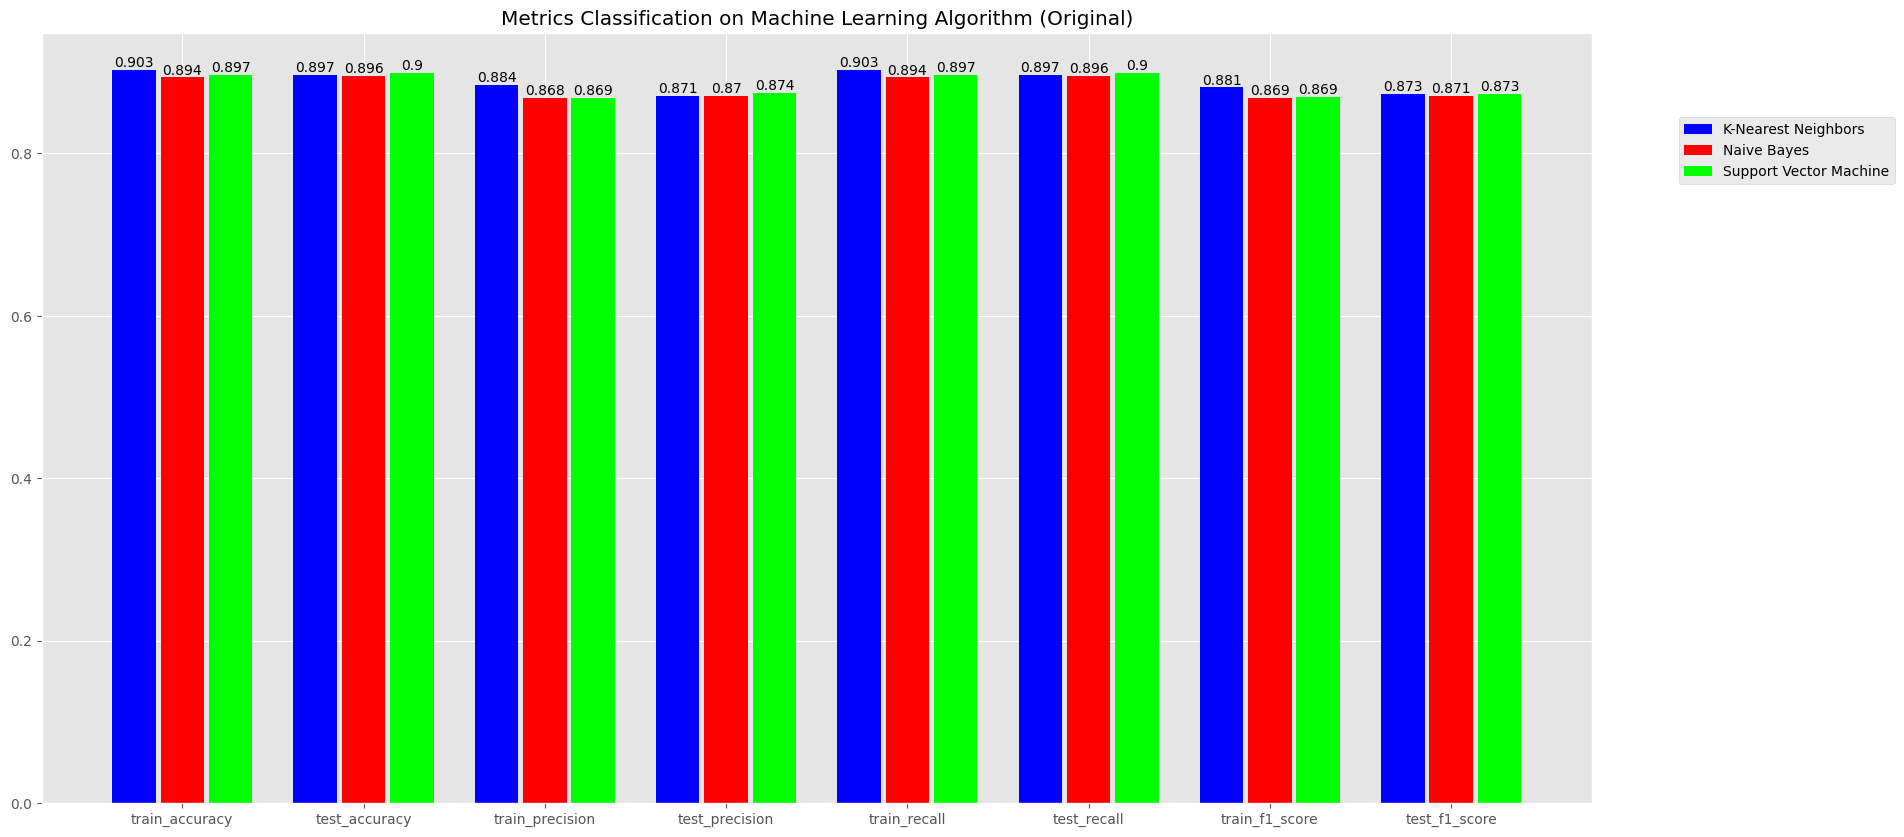

In [ ]:
temp = {}

for i, value in enumerate(data_1['model_type']):
  temp[value] = data_1.iloc[i].values[[3, 8, 4, 9, 5, 10, 6, 11]].tolist()

fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9)
plt.title("Metrics Classification on Machine Learning Algorithm (Original)")
plt.xticks(range(8), data_1.columns[[3, 8, 4, 9, 5, 10, 6, 11]])
plt.show()

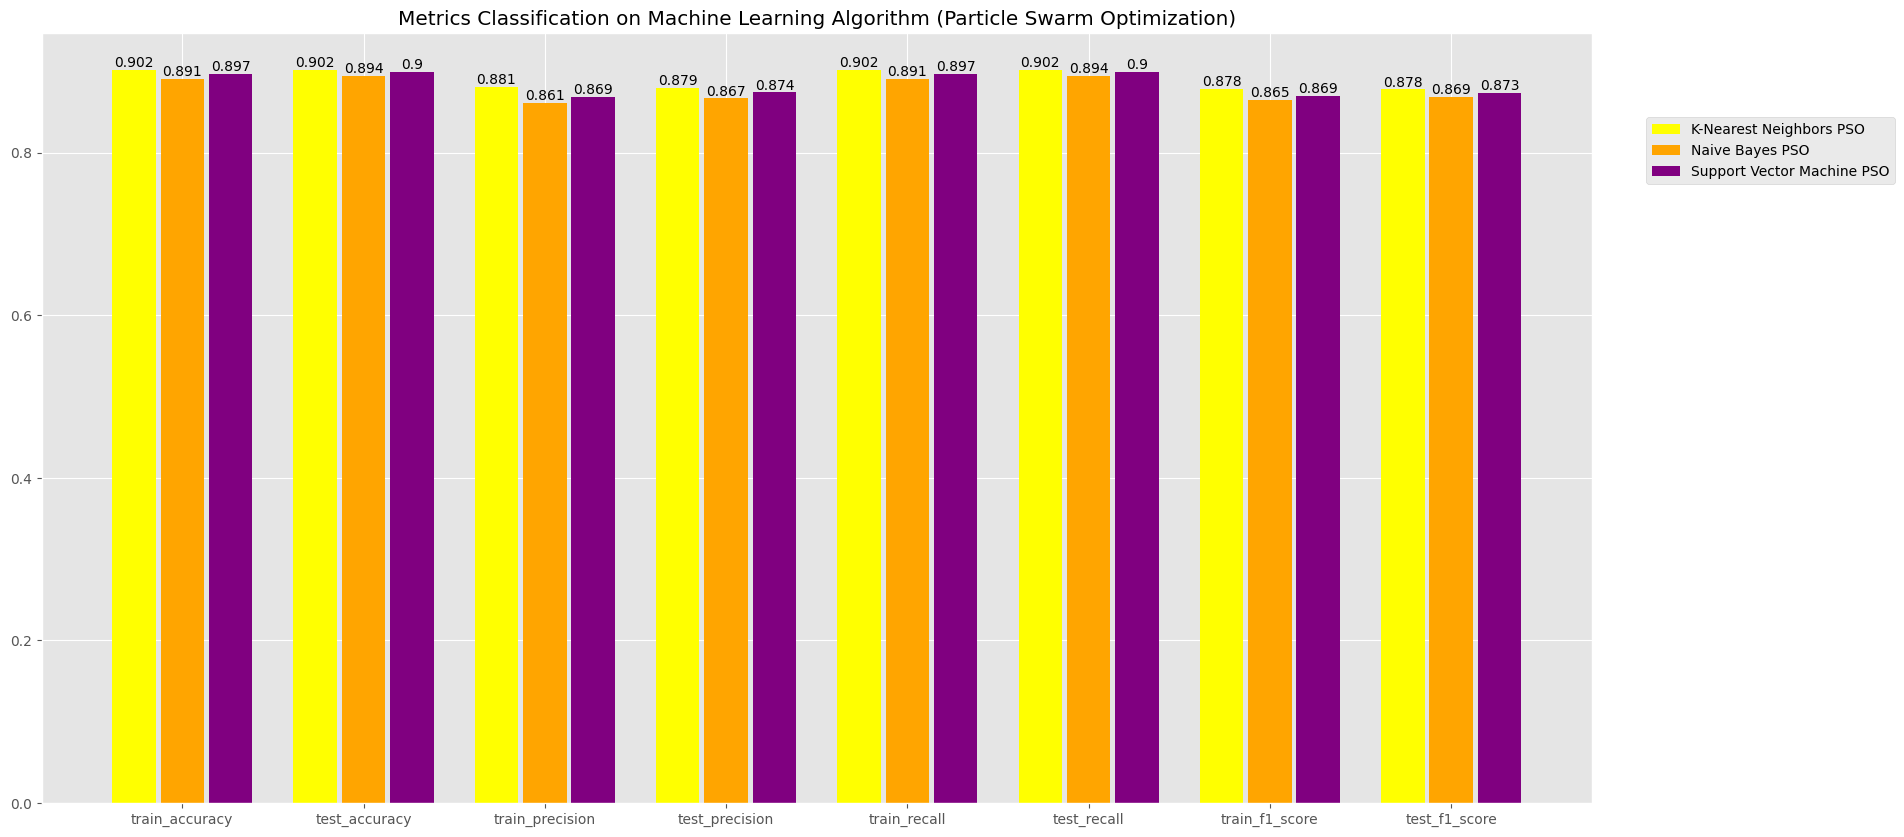

In [ ]:
temp = {}

for i, value in enumerate(data_2['model_type']):
  temp[value] = data_2.iloc[i].values[[3, 8, 4, 9, 5, 10, 6, 11]].tolist()

fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, color_index=3)
plt.title("Metrics Classification on Machine Learning Algorithm (Particle Swarm Optimization)")
plt.xticks(range(8), data_1.columns[[3, 8, 4, 9, 5, 10, 6, 11]])
plt.show()

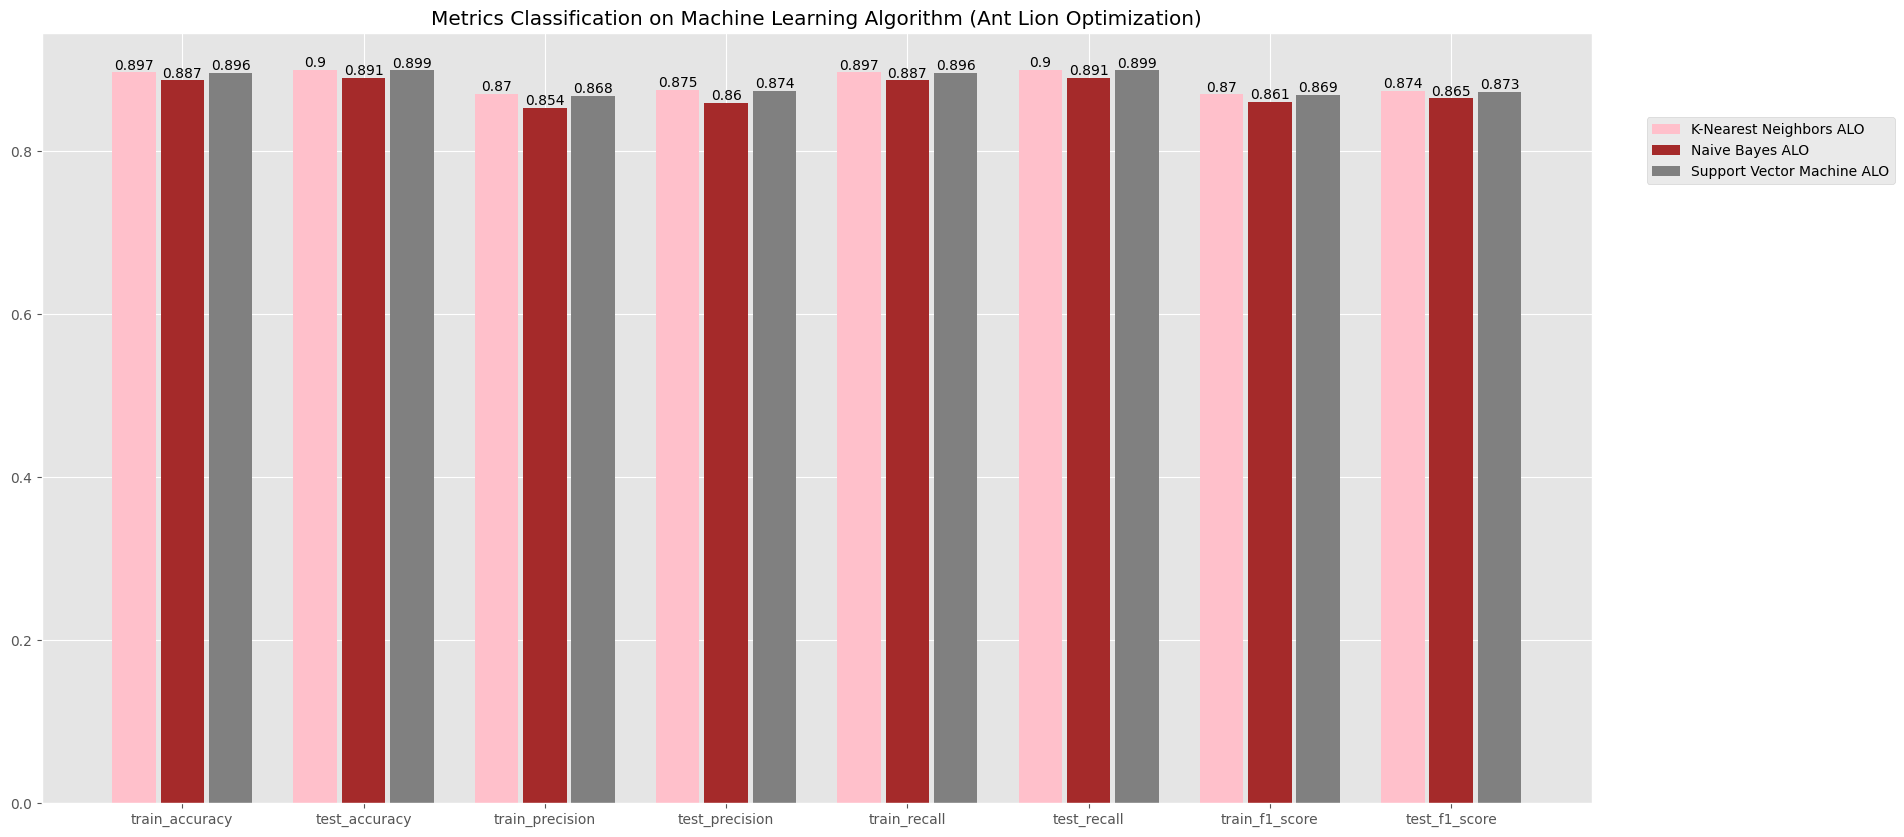

In [ ]:
temp = {}

for i, value in enumerate(data_3['model_type']):
  temp[value] = data_3.iloc[i].values[[3, 8, 4, 9, 5, 10, 6, 11]].tolist()

fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, color_index=6)
plt.title("Metrics Classification on Machine Learning Algorithm (Ant Lion Optimization)")
plt.xticks(range(8), data_1.columns[[3, 8, 4, 9, 5, 10, 6, 11]])
plt.show()

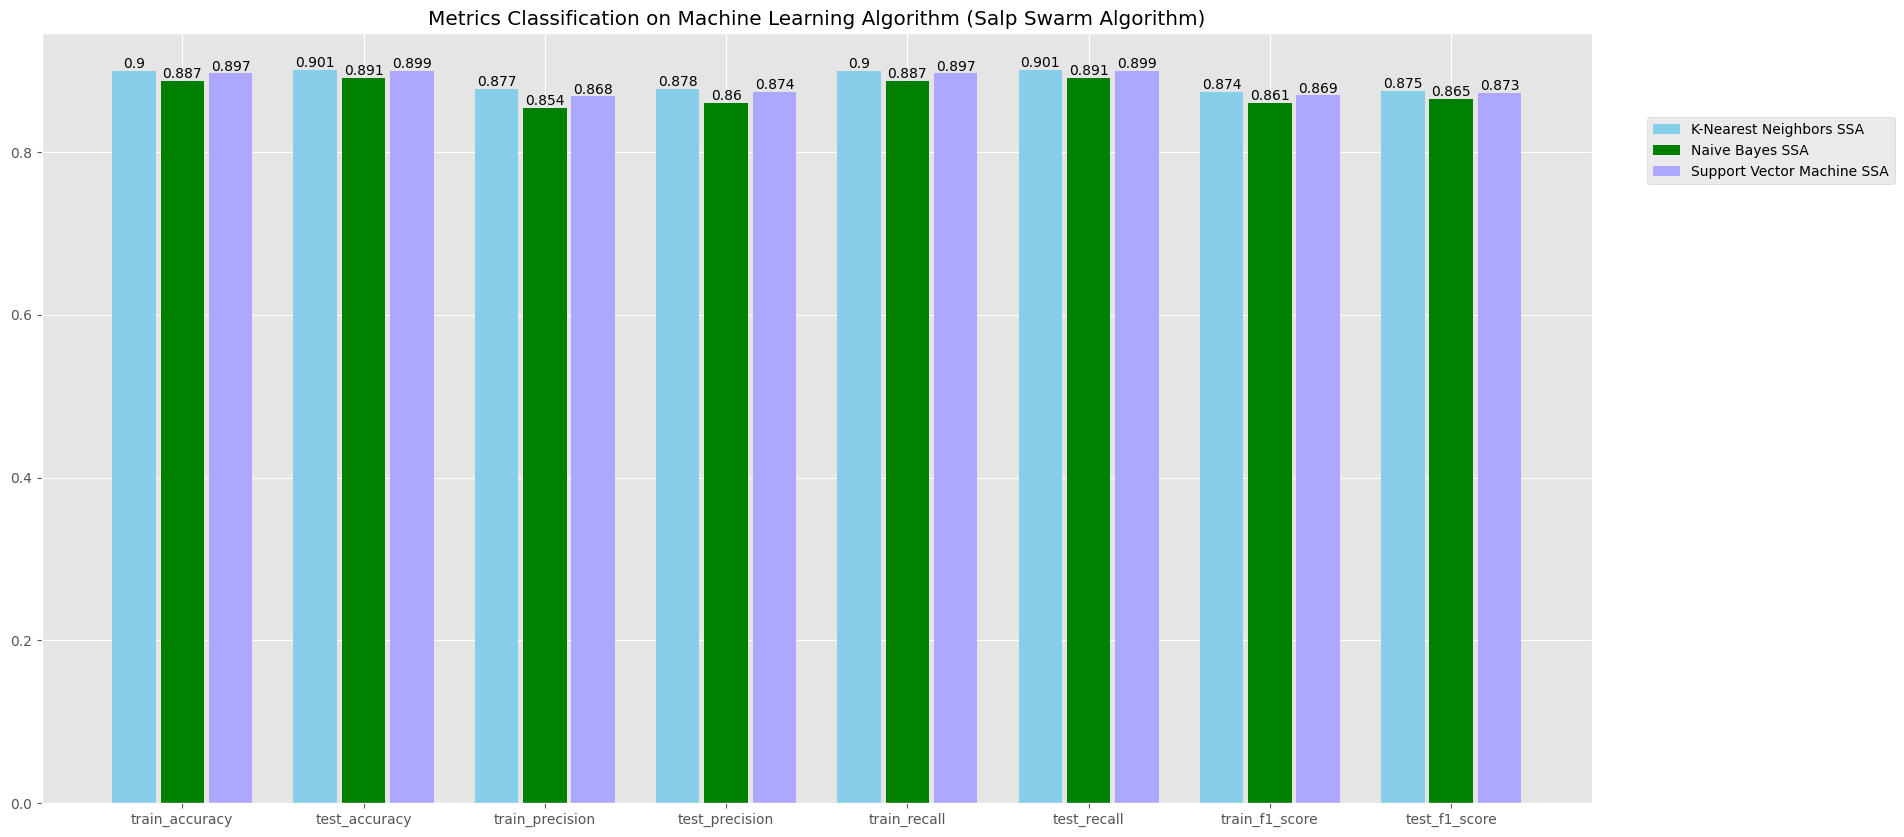

In [ ]:
temp = {}

for i, value in enumerate(data_4['model_type']):
  temp[value] = data_4.iloc[i].values[[3, 8, 4, 9, 5, 10, 6, 11]].tolist()

fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, color_index=9)
plt.title("Metrics Classification on Machine Learning Algorithm (Salp Swarm Algorithm)")
plt.xticks(range(8), data_1.columns[[3, 8, 4, 9, 5, 10, 6, 11]])
plt.show()

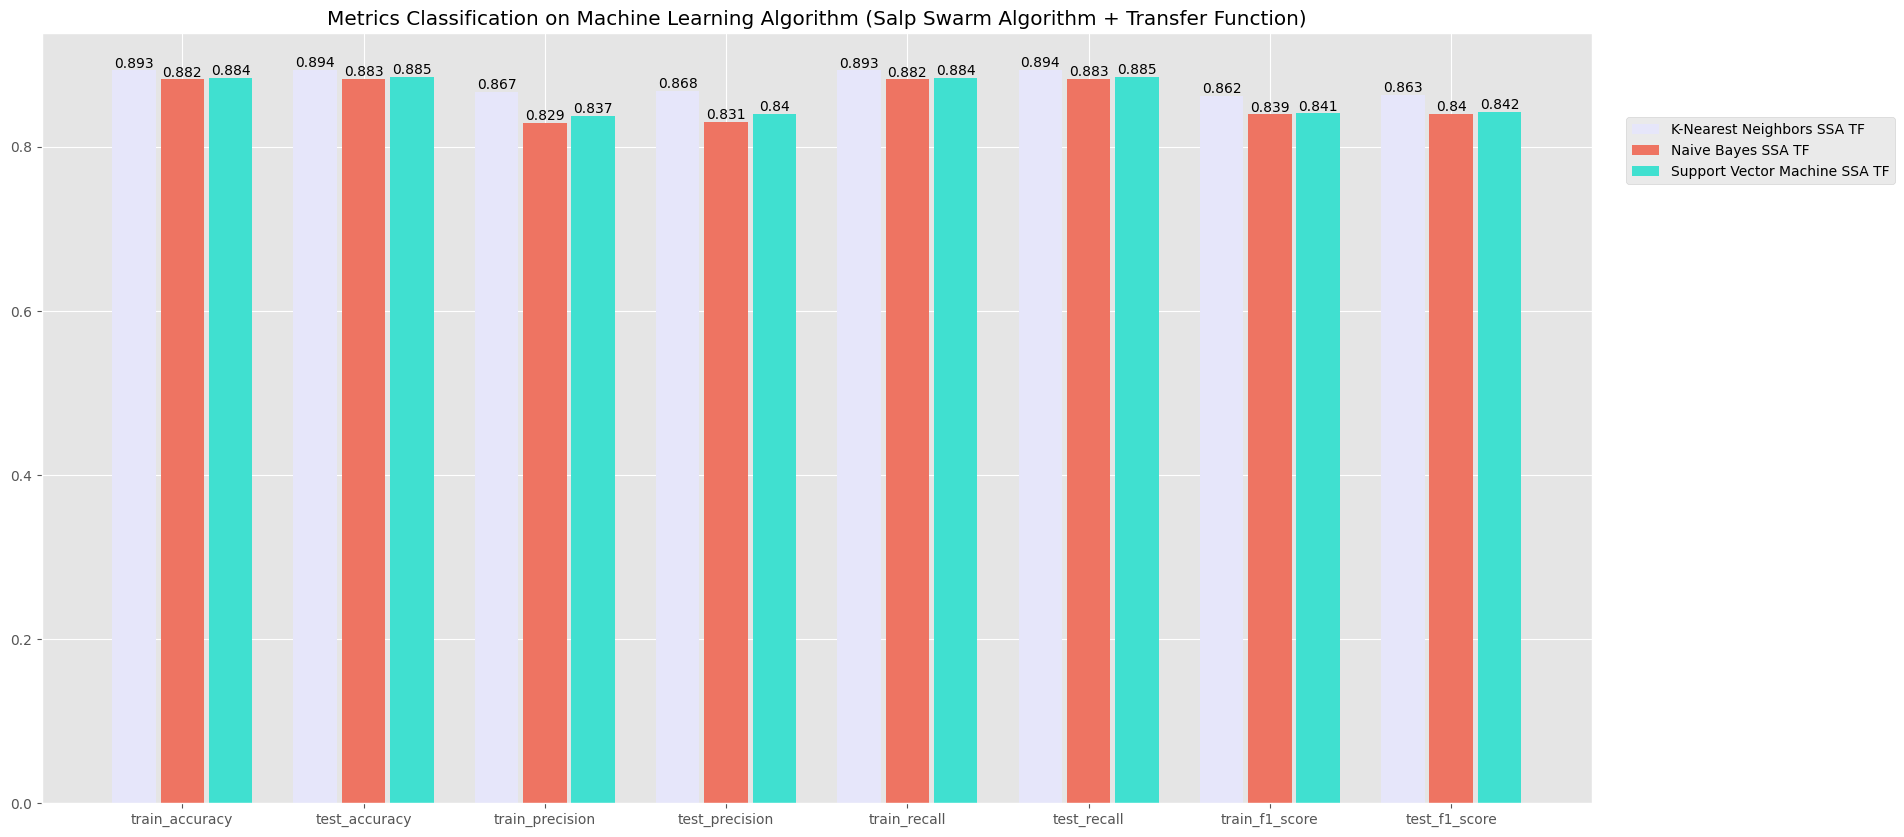

In [ ]:
temp = {}

for i, value in enumerate(data_5['model_type']):
  temp[value] = data_5.iloc[i].values[[3, 8, 4, 9, 5, 10, 6, 11]].tolist()

fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, color_index=12)
plt.title("Metrics Classification on Machine Learning Algorithm (Salp Swarm Algorithm + Transfer Function)")
plt.xticks(range(8), data_1.columns[[3, 8, 4, 9, 5, 10, 6, 11]])
plt.show()

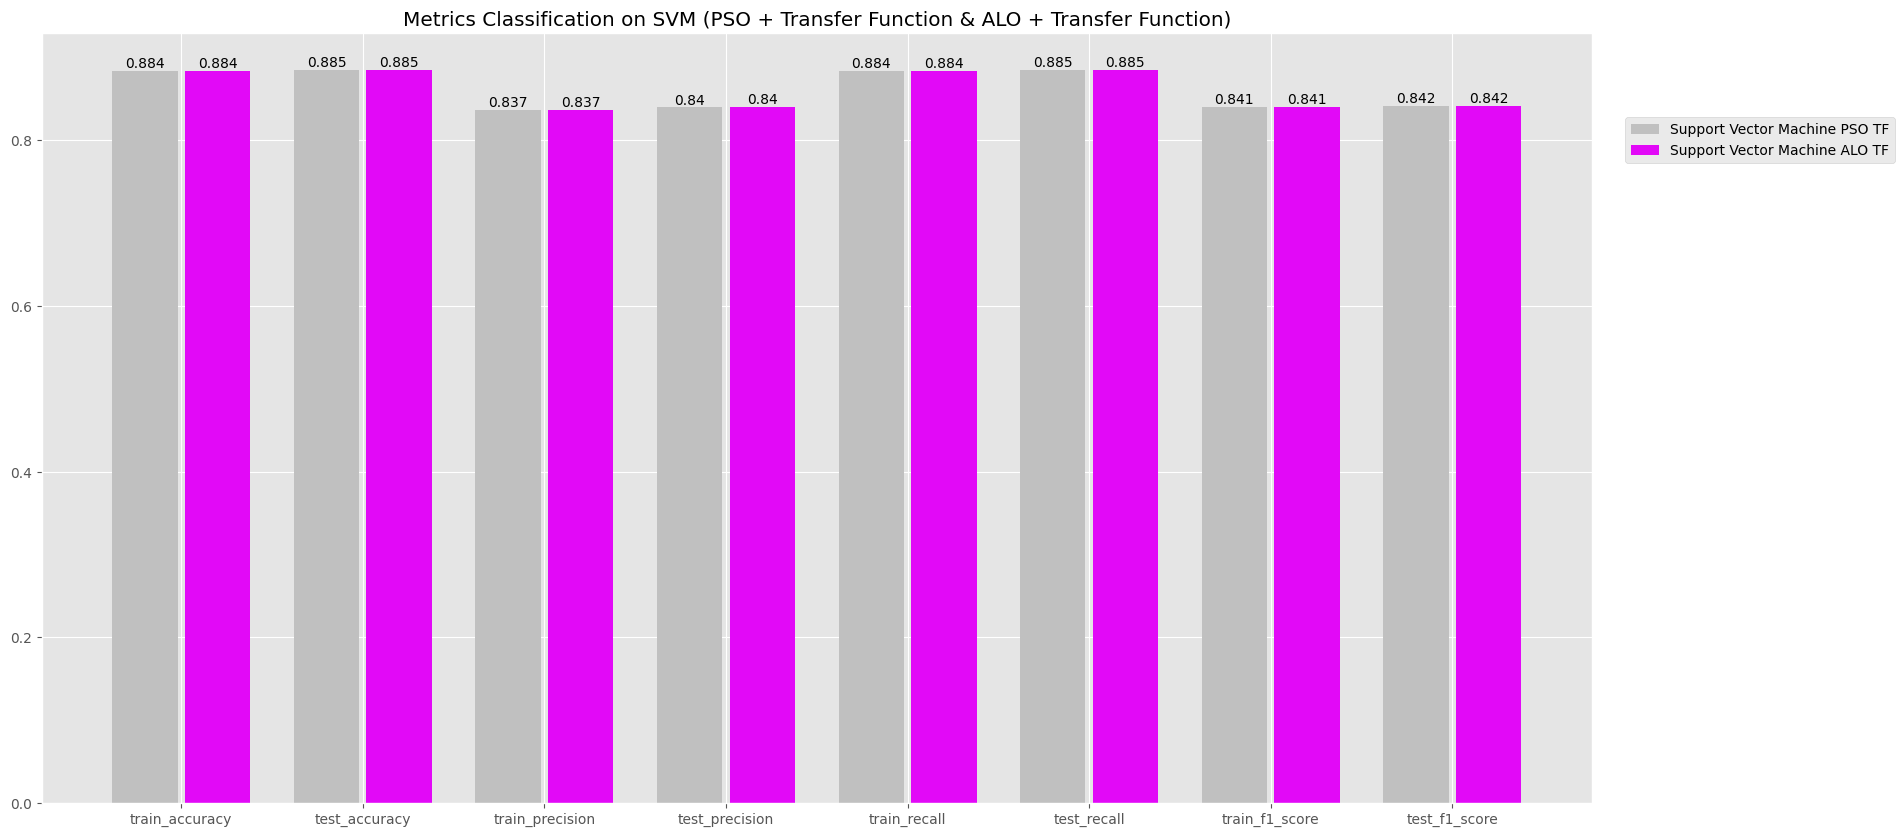

In [ ]:
temp = {}

for i, value in enumerate(data_6['model_type']):
  temp[value] = data_6.iloc[i].values[[3, 8, 4, 9, 5, 10, 6, 11]].tolist()

fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, color_index=15)
plt.title("Metrics Classification on SVM (PSO + Transfer Function & ALO + Transfer Function)")
plt.xticks(range(8), data_1.columns[[3, 8, 4, 9, 5, 10, 6, 11]])
plt.show()

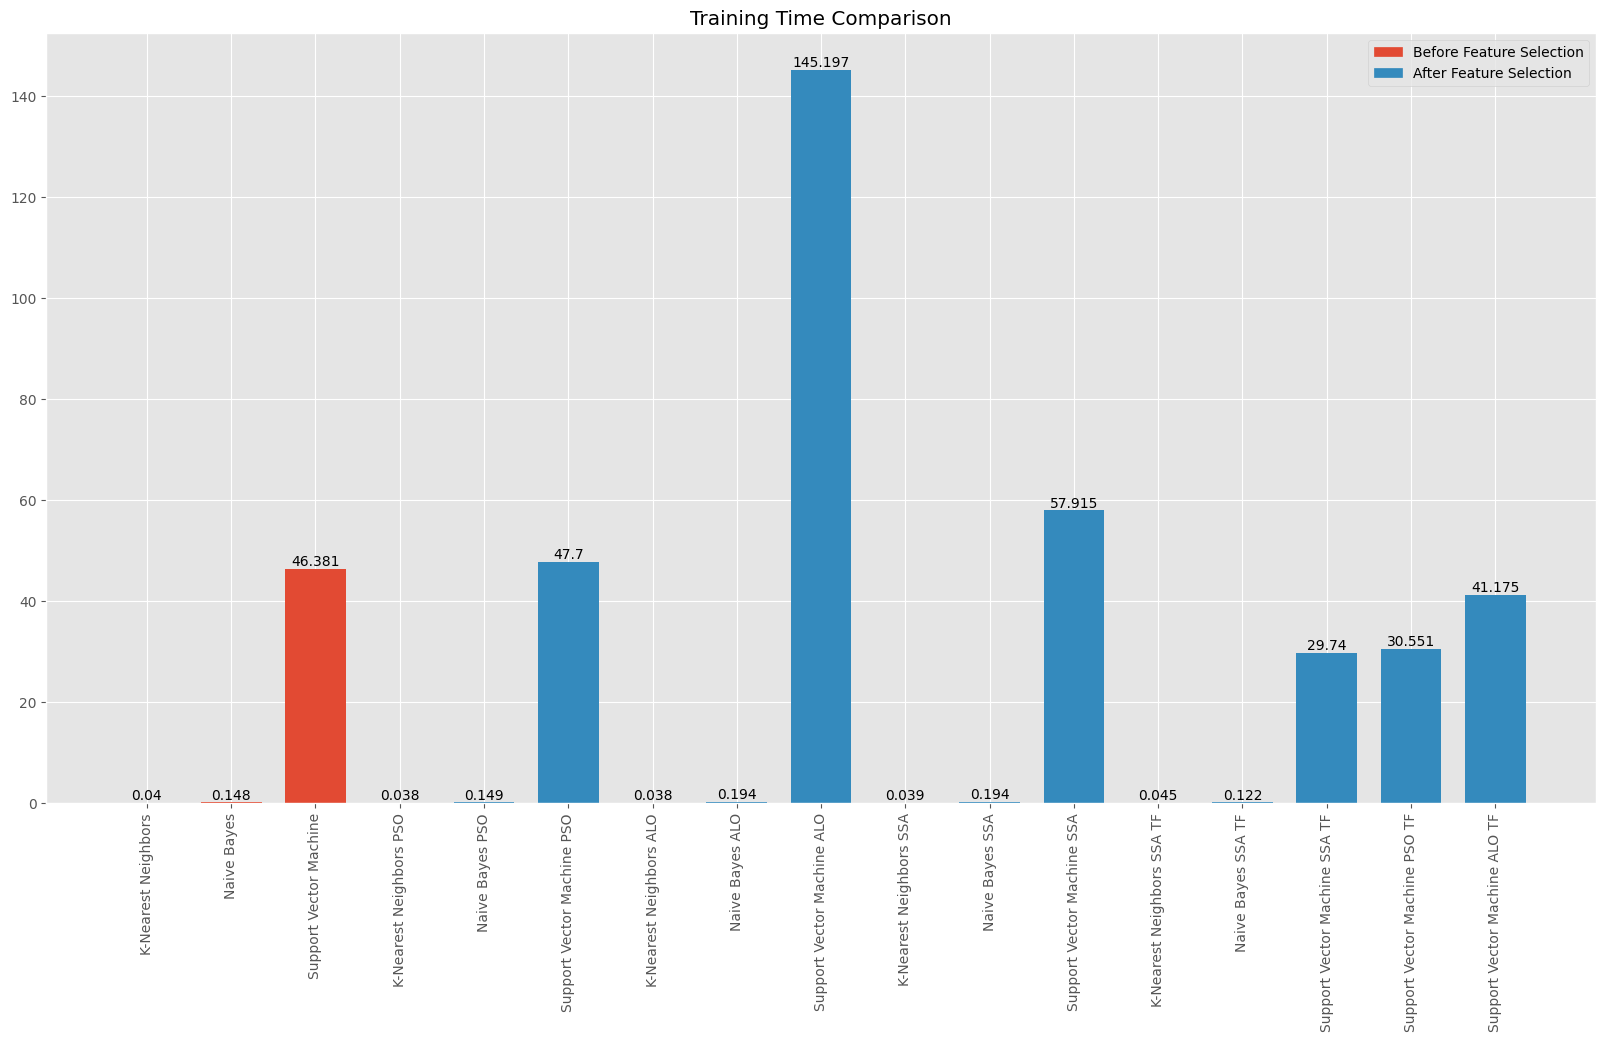

In [ ]:
temp  = {"Time Training" : []}
label = []

for i, value in enumerate(data_1['model_type']):
  label.append(value)
  temp["Time Training"].append(data_1.iloc[i].values[2].tolist())

for i, value in enumerate(data_2['model_type']):
  label.append(value)
  temp["Time Training"].append(data_2.iloc[i].values[2].tolist())

for i, value in enumerate(data_3['model_type']):
  label.append(value)
  temp["Time Training"].append(data_3.iloc[i].values[2].tolist())

for i, value in enumerate(data_4['model_type']):
  label.append(value)
  temp["Time Training"].append(data_4.iloc[i].values[2].tolist())

for i, value in enumerate(data_5['model_type']):
  label.append(value)
  temp["Time Training"].append(data_5.iloc[i].values[2].tolist())

for i, value in enumerate(data_6['model_type']):
  label.append(value)
  temp["Time Training"].append(data_6.iloc[i].values[2].tolist())

fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, legend_outside=False)
plt.title("Training Time Comparison")
plt.xticks(range(len(temp['Time Training'])), label, rotation = 90)
plt.show()

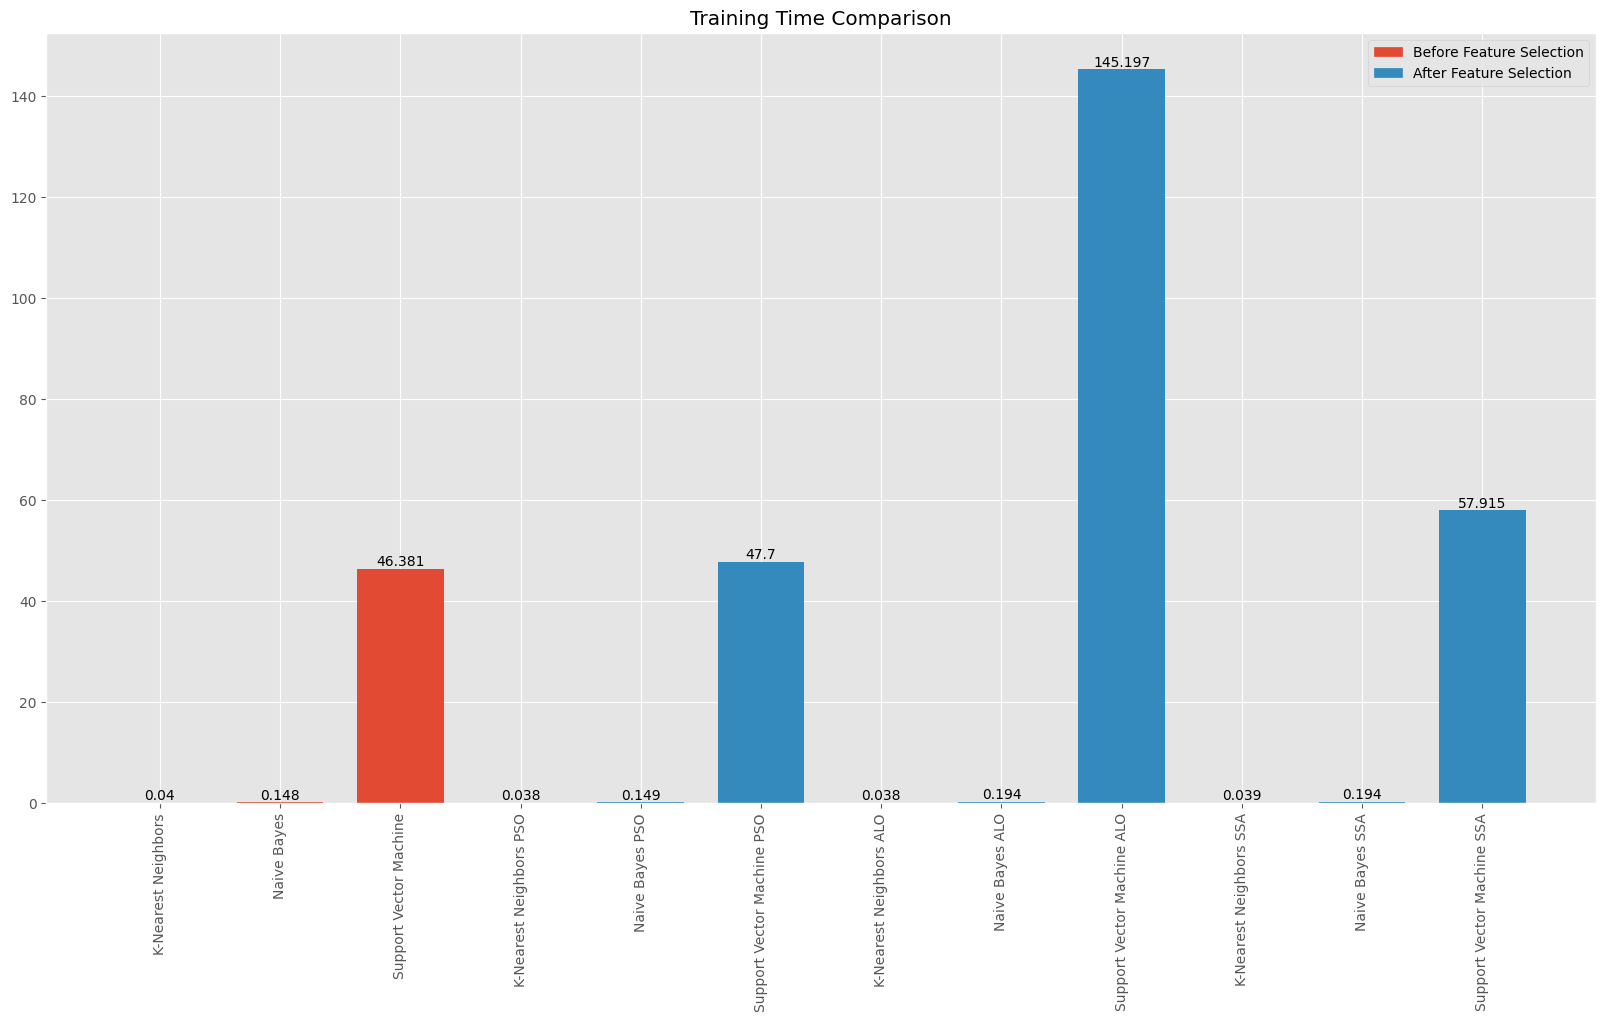

In [ ]:
temp  = {"Time Training" : []}
label = []

for i, value in enumerate(data_1['model_type']):
  label.append(value)
  temp["Time Training"].append(data_1.iloc[i].values[2].tolist())

for i, value in enumerate(data_2['model_type']):
  label.append(value)
  temp["Time Training"].append(data_2.iloc[i].values[2].tolist())

for i, value in enumerate(data_3['model_type']):
  label.append(value)
  temp["Time Training"].append(data_3.iloc[i].values[2].tolist())

for i, value in enumerate(data_4['model_type']):
  label.append(value)
  temp["Time Training"].append(data_4.iloc[i].values[2].tolist())

# for i, value in enumerate(data_5['model_type']):
#   label.append(value)
#   temp["Time Training"].append(data_5.iloc[i].values[2].tolist())

# for i, value in enumerate(data_6['model_type']):
#   label.append(value)
#   temp["Time Training"].append(data_6.iloc[i].values[2].tolist())

fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, legend_outside=False)
plt.title("Training Time Comparison")
plt.xticks(range(len(temp['Time Training'])), label, rotation = 90)
plt.show()

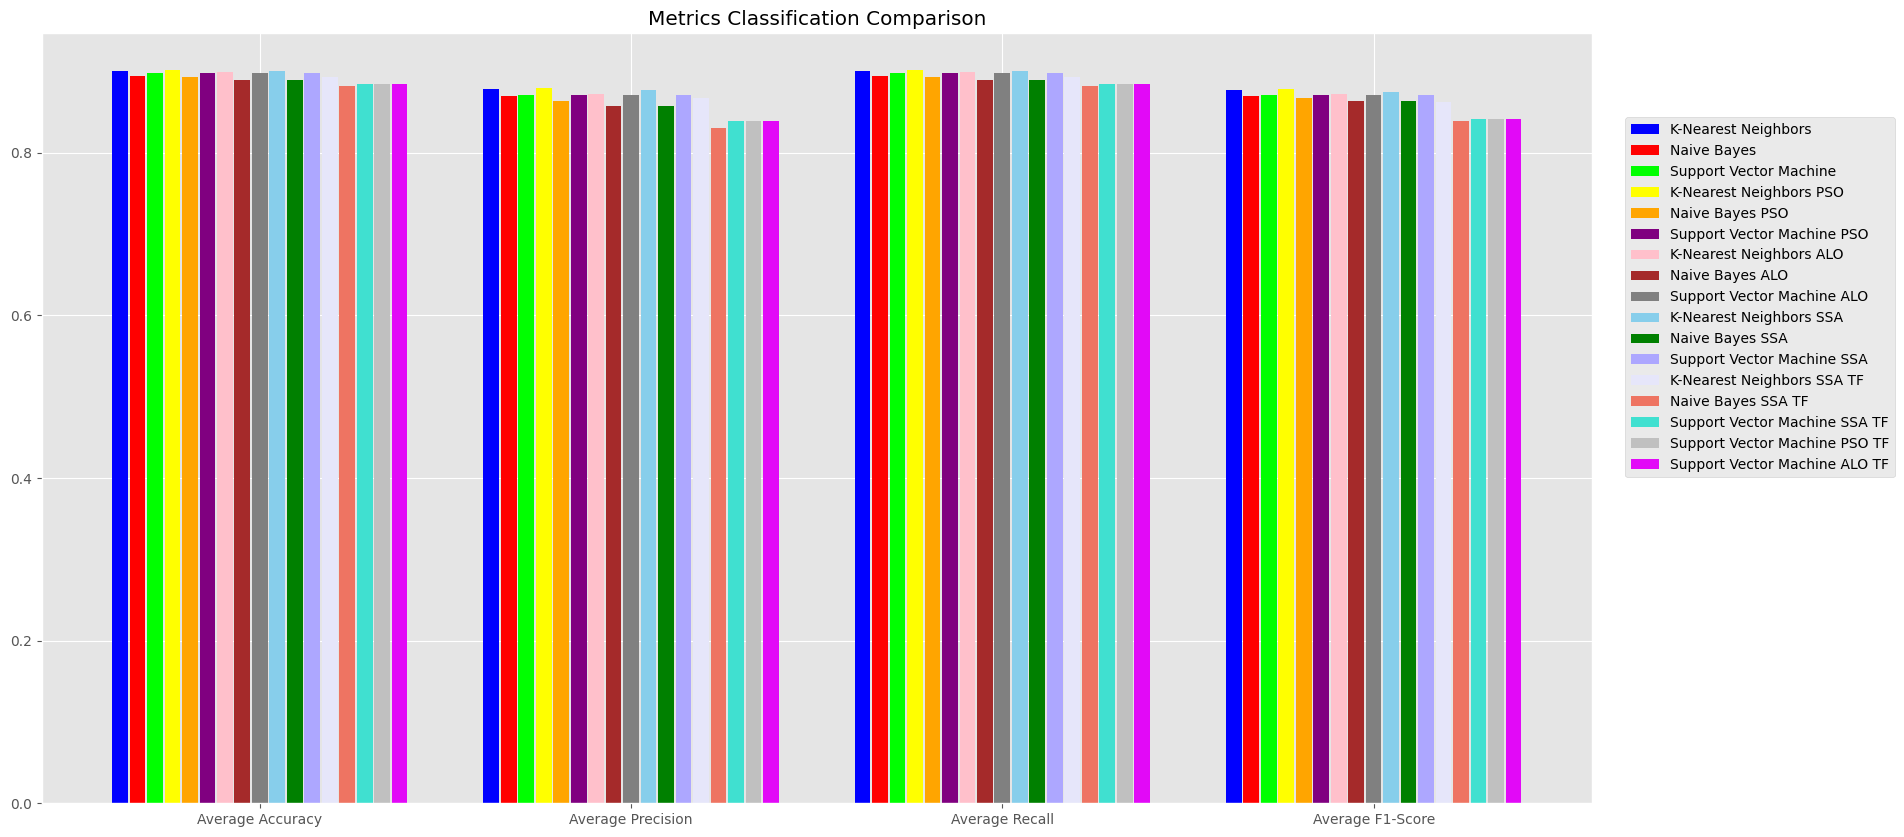

In [ ]:
temp = {}

for i, value in enumerate(data_1['model_type']):
  temp[value] = [
      data_1.iloc[i, [3, 8]].sum() / 2,
      data_1.iloc[i, [4, 9]].sum() / 2,
      data_1.iloc[i, [5, 10]].sum() / 2,
      data_1.iloc[i, [6, 11]].sum() / 2,
  ]

for i, value in enumerate(data_2['model_type']):
  temp[value] = [
      data_2.iloc[i, [3, 8]].sum() / 2,
      data_2.iloc[i, [4, 9]].sum() / 2,
      data_2.iloc[i, [5, 10]].sum() / 2,
      data_2.iloc[i, [6, 11]].sum() / 2,
]

for i, value in enumerate(data_3['model_type']):
    temp[value] = [
      data_3.iloc[i, [3, 8]].sum() / 2,
      data_3.iloc[i, [4, 9]].sum() / 2,
      data_3.iloc[i, [5, 10]].sum() / 2,
      data_3.iloc[i, [6, 11]].sum() / 2,
  ]

for i, value in enumerate(data_4['model_type']):
    temp[value] = [
      data_4.iloc[i, [3, 8]].sum() / 2,
      data_4.iloc[i, [4, 9]].sum() / 2,
      data_4.iloc[i, [5, 10]].sum() / 2,
      data_4.iloc[i, [6, 11]].sum() / 2,
  ]

for i, value in enumerate(data_5['model_type']):
    temp[value] = [
      data_5.iloc[i, [3, 8]].sum() / 2,
      data_5.iloc[i, [4, 9]].sum() / 2,
      data_5.iloc[i, [5, 10]].sum() / 2,
      data_5.iloc[i, [6, 11]].sum() / 2,
  ]

for i, value in enumerate(data_6['model_type']):
  temp[value] = [
      data_6.iloc[i, [3, 8]].sum() / 2,
      data_6.iloc[i, [4, 9]].sum() / 2,
      data_6.iloc[i, [5, 10]].sum() / 2,
      data_6.iloc[i, [6, 11]].sum() / 2,
  ]


fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, not_overlapping=False)
plt.title("Metrics Classification Comparison")
plt.xticks(range(4), ['Average Accuracy', 'Average Precision', 'Average Recall', 'Average F1-Score'])
plt.show()

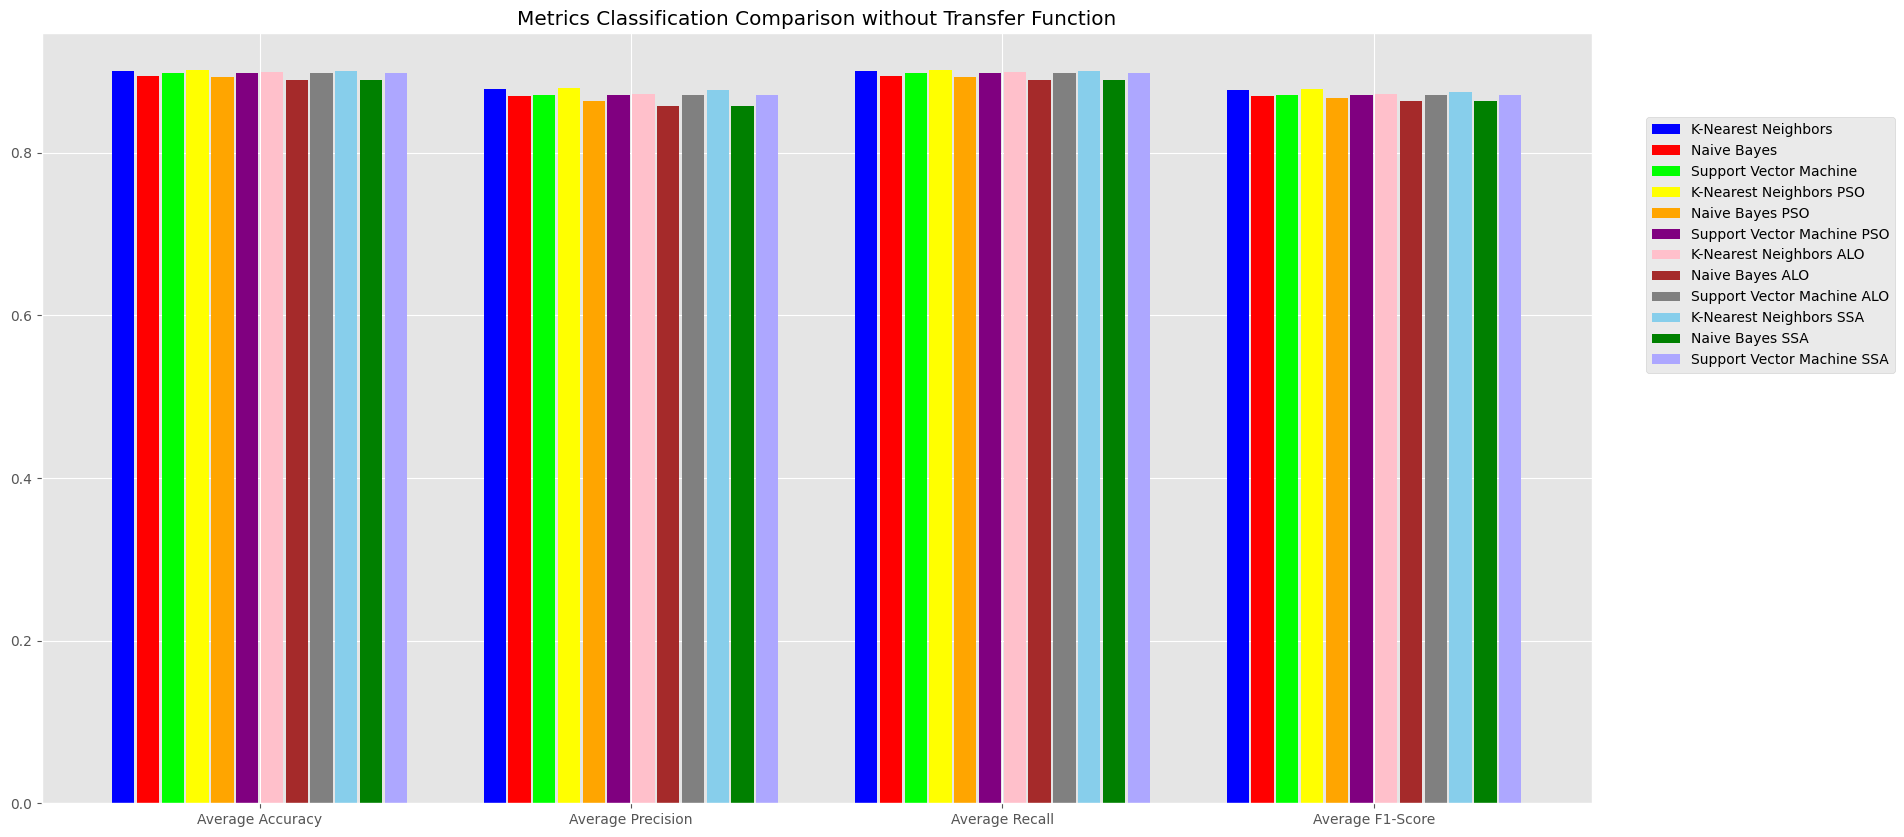

In [ ]:
temp = {}

for i, value in enumerate(data_1['model_type']):
  temp[value] = [
      data_1.iloc[i, [3, 8]].sum() / 2,
      data_1.iloc[i, [4, 9]].sum() / 2,
      data_1.iloc[i, [5, 10]].sum() / 2,
      data_1.iloc[i, [6, 11]].sum() / 2,
  ]

for i, value in enumerate(data_2['model_type']):
  temp[value] = [
      data_2.iloc[i, [3, 8]].sum() / 2,
      data_2.iloc[i, [4, 9]].sum() / 2,
      data_2.iloc[i, [5, 10]].sum() / 2,
      data_2.iloc[i, [6, 11]].sum() / 2,
]

for i, value in enumerate(data_3['model_type']):
    temp[value] = [
      data_3.iloc[i, [3, 8]].sum() / 2,
      data_3.iloc[i, [4, 9]].sum() / 2,
      data_3.iloc[i, [5, 10]].sum() / 2,
      data_3.iloc[i, [6, 11]].sum() / 2,
  ]

for i, value in enumerate(data_4['model_type']):
    temp[value] = [
      data_4.iloc[i, [3, 8]].sum() / 2,
      data_4.iloc[i, [4, 9]].sum() / 2,
      data_4.iloc[i, [5, 10]].sum() / 2,
      data_4.iloc[i, [6, 11]].sum() / 2,
  ]

# for i, value in enumerate(data_5['model_type']):
#     temp[value] = [
#       data_5.iloc[i, [3, 8]].sum() / 2,
#       data_5.iloc[i, [4, 9]].sum() / 2,
#       data_5.iloc[i, [5, 10]].sum() / 2,
#       data_5.iloc[i, [6, 11]].sum() / 2,
#   ]

# for i, value in enumerate(data_6['model_type']):
#   temp[value] = [
#       data_6.iloc[i, [3, 8]].sum() / 2,
#       data_6.iloc[i, [4, 9]].sum() / 2,
#       data_6.iloc[i, [5, 10]].sum() / 2,
#       data_6.iloc[i, [6, 11]].sum() / 2,
#   ]


fig, ax = plt.subplots(figsize = (20, 10))
bar_plot(ax, temp, total_width=.8, single_width=.9, not_overlapping=False)
plt.title("Metrics Classification Comparison without Transfer Function")
plt.xticks(range(4), ['Average Accuracy', 'Average Precision', 'Average Recall', 'Average F1-Score'])
plt.show()

In [ ]:
[[i, j] for i, j in enumerate(data_1.columns)]

[[0, 'model_type'],
 [1, 'ratio_data'],
 [2, 'training_time'],
 [3, 'train_accuracy'],
 [4, 'train_precision'],
 [5, 'train_recall'],
 [6, 'train_f1_score'],
 [7, 'train_support'],
 [8, 'test_accuracy'],
 [9, 'test_precision'],
 [10, 'test_recall'],
 [11, 'test_f1_score'],
 [12, 'test_support']]

# Convergence Curve Visualisation

## Accuracy

In [ ]:
# define normalized model name.
mapping_model = {
    'bnb' : 'Naive Bayes',
    'svm' : 'SVM',
    'knn' : 'KNN'
}

def preprocess_name(fname, func=lambda x: mapping_model[x] if x in mapping_model else x):
    fname = fname.split(".")[0]
    list_fname = [func(i)  for i in fname.split("_")]
    fname_result = " ".join(list_fname).title()
    return fname_result

In [ ]:
# define blank list based on preprocessed data in metrics_tf
list_acc, list_fitness, list_time, list_algo = [], [], [], []
basedir = 'metrics_tf/'

for i in list_tf_bnb:
  temp_df = pd.read_excel(basedir + i)
  temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
  temp_df_filter = temp_df[temp_df['Feature'] != 0]
  list_acc.append(temp_df_filter['acc'].mean())
  list_fitness.append(temp_df_filter['Fitness'].mean())
  list_time.append(temp_df_filter['Time (s)'].mean())
  list_algo.append(preprocess_name(i))

for i in list_tf_svm:
  temp_df = pd.read_excel(basedir + i)
  temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
  temp_df_filter = temp_df[temp_df['Feature'] != 0]
  list_acc.append(temp_df_filter['acc'].mean())
  list_fitness.append(temp_df_filter['Fitness'].mean())
  list_time.append(temp_df_filter['Time (s)'].mean())
  list_algo.append(preprocess_name(i))

for i in list_tf_knn:
  temp_df = pd.read_excel(basedir + i)
  temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
  temp_df_filter = temp_df[temp_df['Feature'] != 0]
  list_acc.append(temp_df_filter['acc'].mean())
  list_fitness.append(temp_df_filter['Fitness'].mean())
  list_time.append(temp_df_filter['Time (s)'].mean())
  list_algo.append(preprocess_name(i))

In [ ]:
# Check dimension
len(list_acc), len(list_fitness), len(list_time), len(list_algo)

(75, 75, 75, 75)

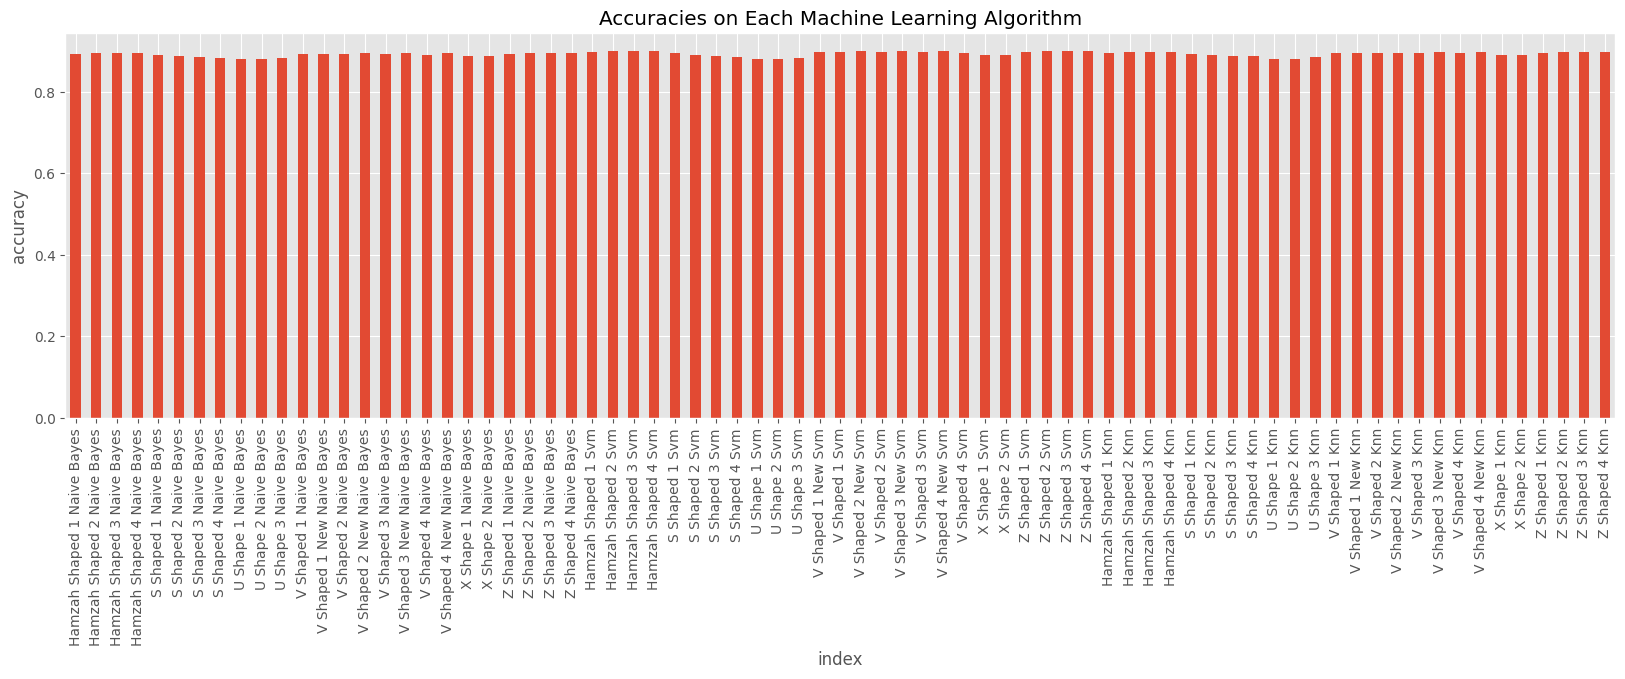

In [ ]:
temp_df = pd.DataFrame({"index" : list(range(75)), "accuracy" : list_acc})
ax = temp_df['accuracy'].plot(
    kind = "bar", rot = 90, xlabel = "index", ylabel = "accuracy",
    title = "Accuracies on Each Machine Learning Algorithm", figsize = (20, 5)
    )
ax.set_xticklabels(list_algo)
plt.show()

In [ ]:
# define blank list based on preprocessed data in metrics_tf
list_acc, list_fitness, list_time, list_algo = [], [], [], []
basedir = 'metrics_tf/'

for i in list_tf_bnb:
  if "hamzah" not in i:
    temp_df = pd.read_excel(basedir + i)
    temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
    temp_df_filter = temp_df[temp_df['Feature'] != 0]
    list_acc.append(temp_df_filter['acc'].mean())
    list_fitness.append(temp_df_filter['Fitness'].mean())
    list_time.append(temp_df_filter['Time (s)'].mean())
    list_algo.append(preprocess_name(i))

for i in list_tf_svm:
  if "hamzah" not in i:
    temp_df = pd.read_excel(basedir + i)
    temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
    temp_df_filter = temp_df[temp_df['Feature'] != 0]
    list_acc.append(temp_df_filter['acc'].mean())
    list_fitness.append(temp_df_filter['Fitness'].mean())
    list_time.append(temp_df_filter['Time (s)'].mean())
    list_algo.append(preprocess_name(i))

for i in list_tf_knn:
  if "hamzah" not in i:
    temp_df = pd.read_excel(basedir + i)
    temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
    temp_df_filter = temp_df[temp_df['Feature'] != 0]
    list_acc.append(temp_df_filter['acc'].mean())
    list_fitness.append(temp_df_filter['Fitness'].mean())
    list_time.append(temp_df_filter['Time (s)'].mean())
    list_algo.append(preprocess_name(i))

In [ ]:
# Check dimension
len(list_acc), len(list_fitness), len(list_time), len(list_algo)

(63, 63, 63, 63)

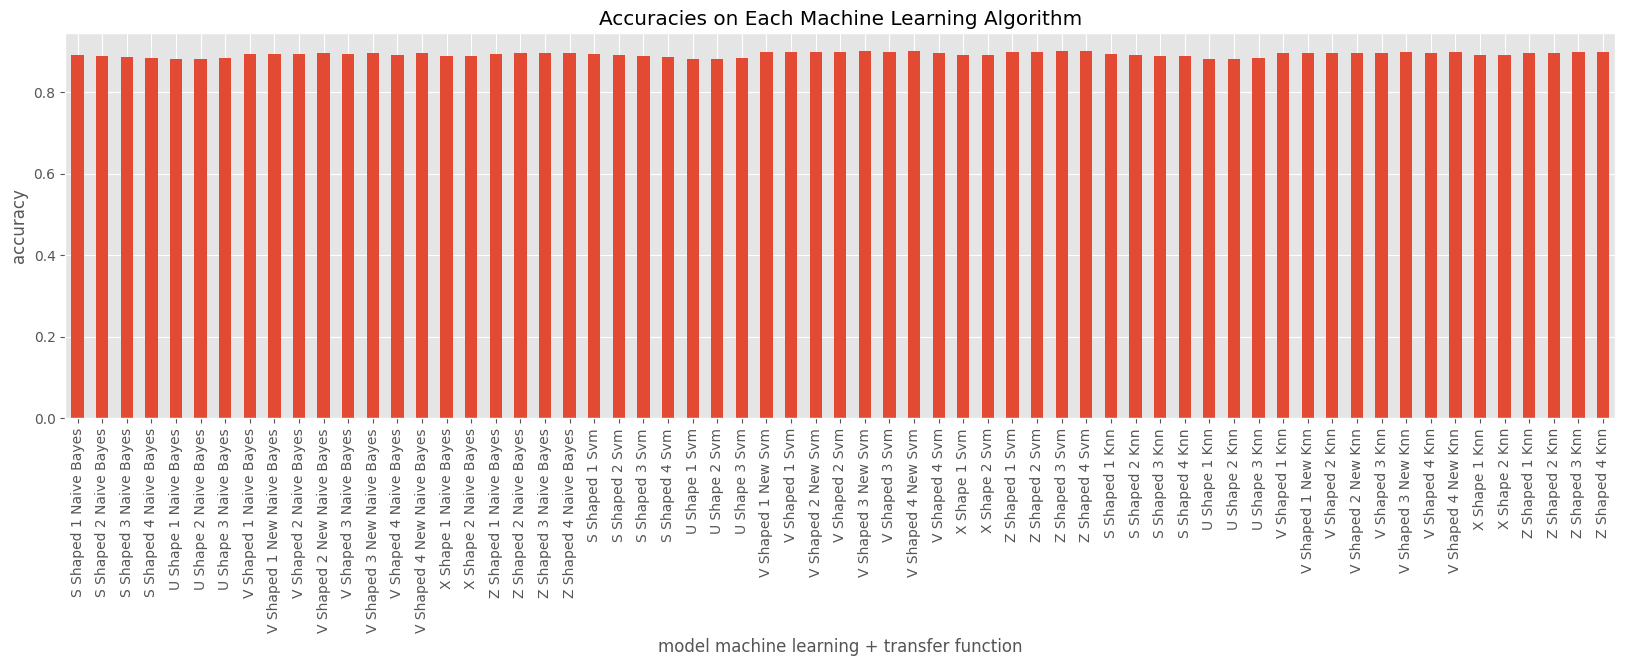

In [ ]:
temp_df = pd.DataFrame({"index" : list(range(63)), "accuracy" : list_acc})
ax = temp_df['accuracy'].plot(
    kind = "bar", rot = 90, xlabel = "model machine learning + transfer function", ylabel = "accuracy",
    title = "Accuracies on Each Machine Learning Algorithm", figsize = (20, 5)
    )
ax.set_xticklabels(list_algo)
plt.show()

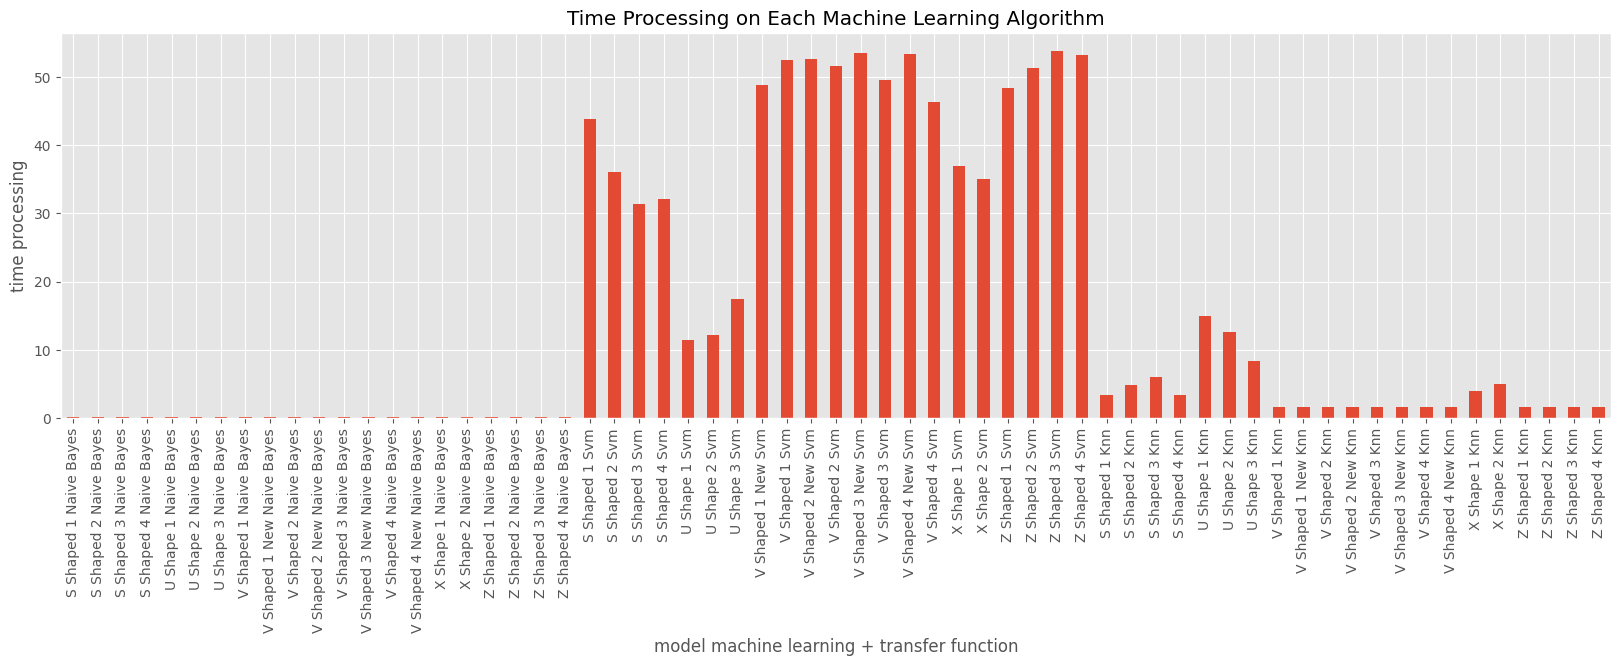

In [ ]:
temp_df = pd.DataFrame({"index" : list(range(63)), "time processing" : list_time})
ax = temp_df['time processing'].plot(
    kind = "bar", rot = 90, xlabel = "model machine learning + transfer function", ylabel = "time processing",
    title = "Time Processing on Each Machine Learning Algorithm", figsize = (20, 5)
    )
ax.set_xticklabels(list_algo)
plt.show()

## Convergence

In [ ]:
temp = {}
target_shape = "s_shape"

for i in list_tf_bnb:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(20, 100) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_svm:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(20, 100) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_knn:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(20, 100) / 100 for i in temp_df['Fitness'].tolist()]

In [ ]:
df_s_shape = pd.DataFrame(temp)

In [ ]:
df_s_shape

,S Shaped 1 Naive Bayes,S Shaped 2 Naive Bayes,S Shaped 3 Naive Bayes,S Shaped 4 Naive Bayes,S Shaped 1 Svm,S Shaped 2 Svm,S Shaped 3 Svm,S Shaped 4 Svm,S Shaped 1 Knn,S Shaped 2 Knn,S Shaped 3 Knn,S Shaped 4 Knn
0,0.680000,0.860000,0.118419,0.118419,0.260000,0.960000,0.118419,0.118419,0.820000,0.360000,0.120098,0.119335
1,0.500000,0.630000,0.118419,0.116283,0.710000,0.460000,0.118419,0.116817,0.810000,0.830000,0.118648,0.117122
2,0.410000,0.720000,0.118419,0.116206,0.730000,0.210000,0.118419,0.116740,0.460000,0.350000,0.119792,0.111933
3,0.230000,0.118419,0.116283,0.116206,0.430000,0.118419,0.116817,0.116740,0.410000,0.118648,0.117275,0.112239
4,0.240000,0.118419,0.116206,0.116359,0.910000,0.118419,0.116740,0.116740,0.950000,0.120098,0.111933,0.111476
5,0.690000,0.118419,0.116206,0.116359,0.460000,0.118419,0.116740,0.116740,0.250000,0.119792,0.112010,0.111857
6,0.118419,0.116206,0.116359,0.113765,0.118419,0.116740,0.116740,0.114757,0.120098,0.111933,0.111857,0.111476
7,0.116206,0.116359,0.113765,0.113994,0.116740,0.116740,0.114757,0.114757,0.111933,0.111857,0.111399,0.109416
8,0.119258,0.119258,0.119258,0.119258,0.114757,0.114757,0.114757,0.114757,0.109263,0.109263,0.109263,0.109263
9,0.107432,0.120403,0.119411,0.119335,0.103922,0.114757,0.114757,0.114757,0.105143,0.111399,0.109568,0.110102


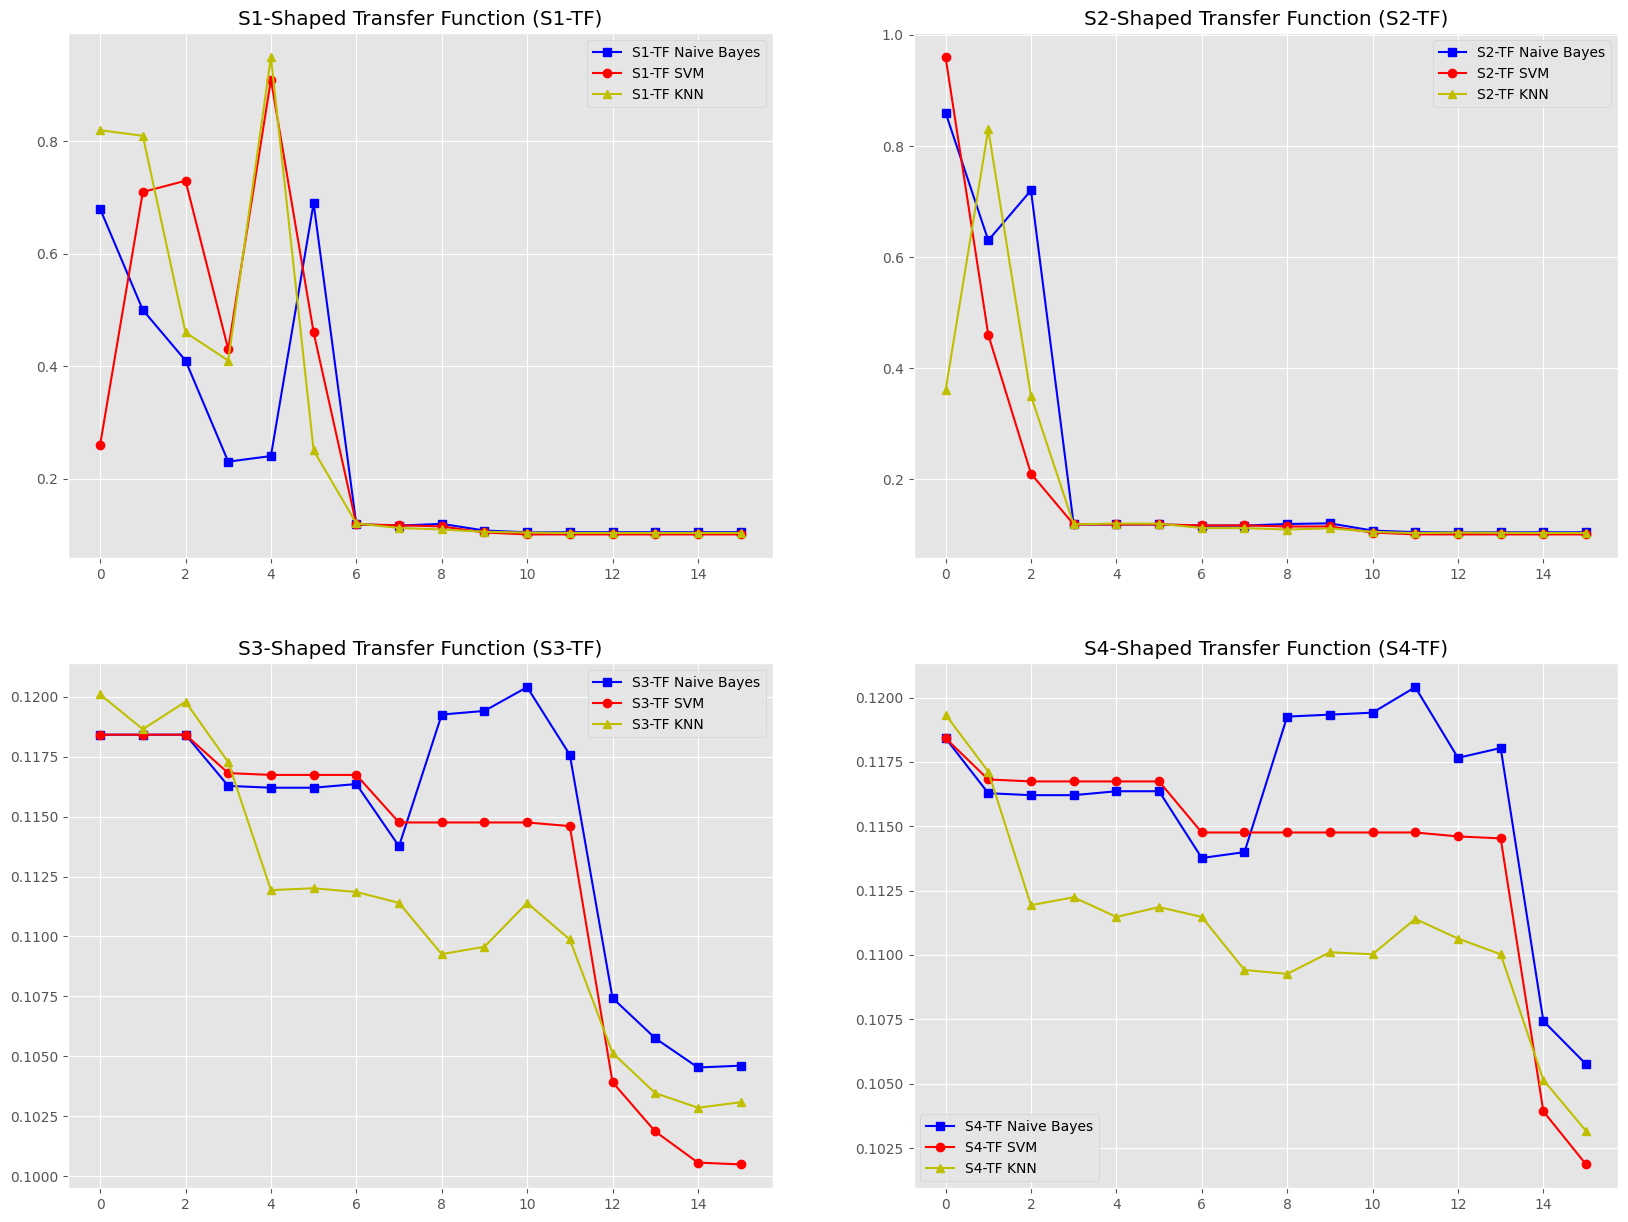

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))

count = 1
for i in range(2):
  for j in range(2):
    col = [i for i in df_s_shape.columns if str(count) in i]
    df_s_shape[col].plot(ax = ax[i, j], style = ['bs-','ro-','y^-'])
    ax[i, j].set_title(f"S{count}-Shaped Transfer Function (S{count}-TF)")
    ax[i, j].legend([f'S{count}-TF Naive Bayes', f'S{count}-TF SVM', f'S{count}-TF KNN'])
    count += 1
plt.show()

In [ ]:
temp = {}
target_shape = "u_shape"

for i in list_tf_bnb:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(10, 60) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_svm:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(10, 60) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_knn:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(10, 60) / 100 for i in temp_df['Fitness'].tolist()]

In [ ]:
df_u_shape = pd.DataFrame(temp)

In [ ]:
df_u_shape

,U Shape 1 Naive Bayes,U Shape 2 Naive Bayes,U Shape 3 Naive Bayes,U Shape 1 Svm,U Shape 2 Svm,U Shape 3 Svm,U Shape 1 Knn,U Shape 2 Knn,U Shape 3 Knn
0,0.118419,0.118419,0.113612,0.118419,0.118419,0.114757,0.118648,0.119792,0.110942
1,0.460000,0.118419,0.116359,0.480000,0.118419,0.116740,0.440000,0.118648,0.111247
2,0.190000,0.118419,0.116206,0.420000,0.118419,0.116740,0.330000,0.120098,0.112391
3,0.550000,0.118419,0.118419,0.470000,0.118419,0.118419,0.110000,0.118648,0.119335
4,0.380000,0.118419,0.118419,0.470000,0.118419,0.118419,0.540000,0.118648,0.118648
5,0.570000,0.160000,0.118419,0.470000,0.480000,0.118419,0.310000,0.140000,0.118648
6,0.470000,0.250000,0.270000,0.360000,0.510000,0.590000,0.300000,0.210000,0.370000
7,0.310000,0.320000,0.340000,0.140000,0.520000,0.130000,0.300000,0.360000,0.160000
8,0.420000,0.180000,0.530000,0.130000,0.210000,0.340000,0.250000,0.440000,0.130000
9,0.410000,0.340000,0.510000,0.200000,0.350000,0.300000,0.300000,0.480000,0.400000


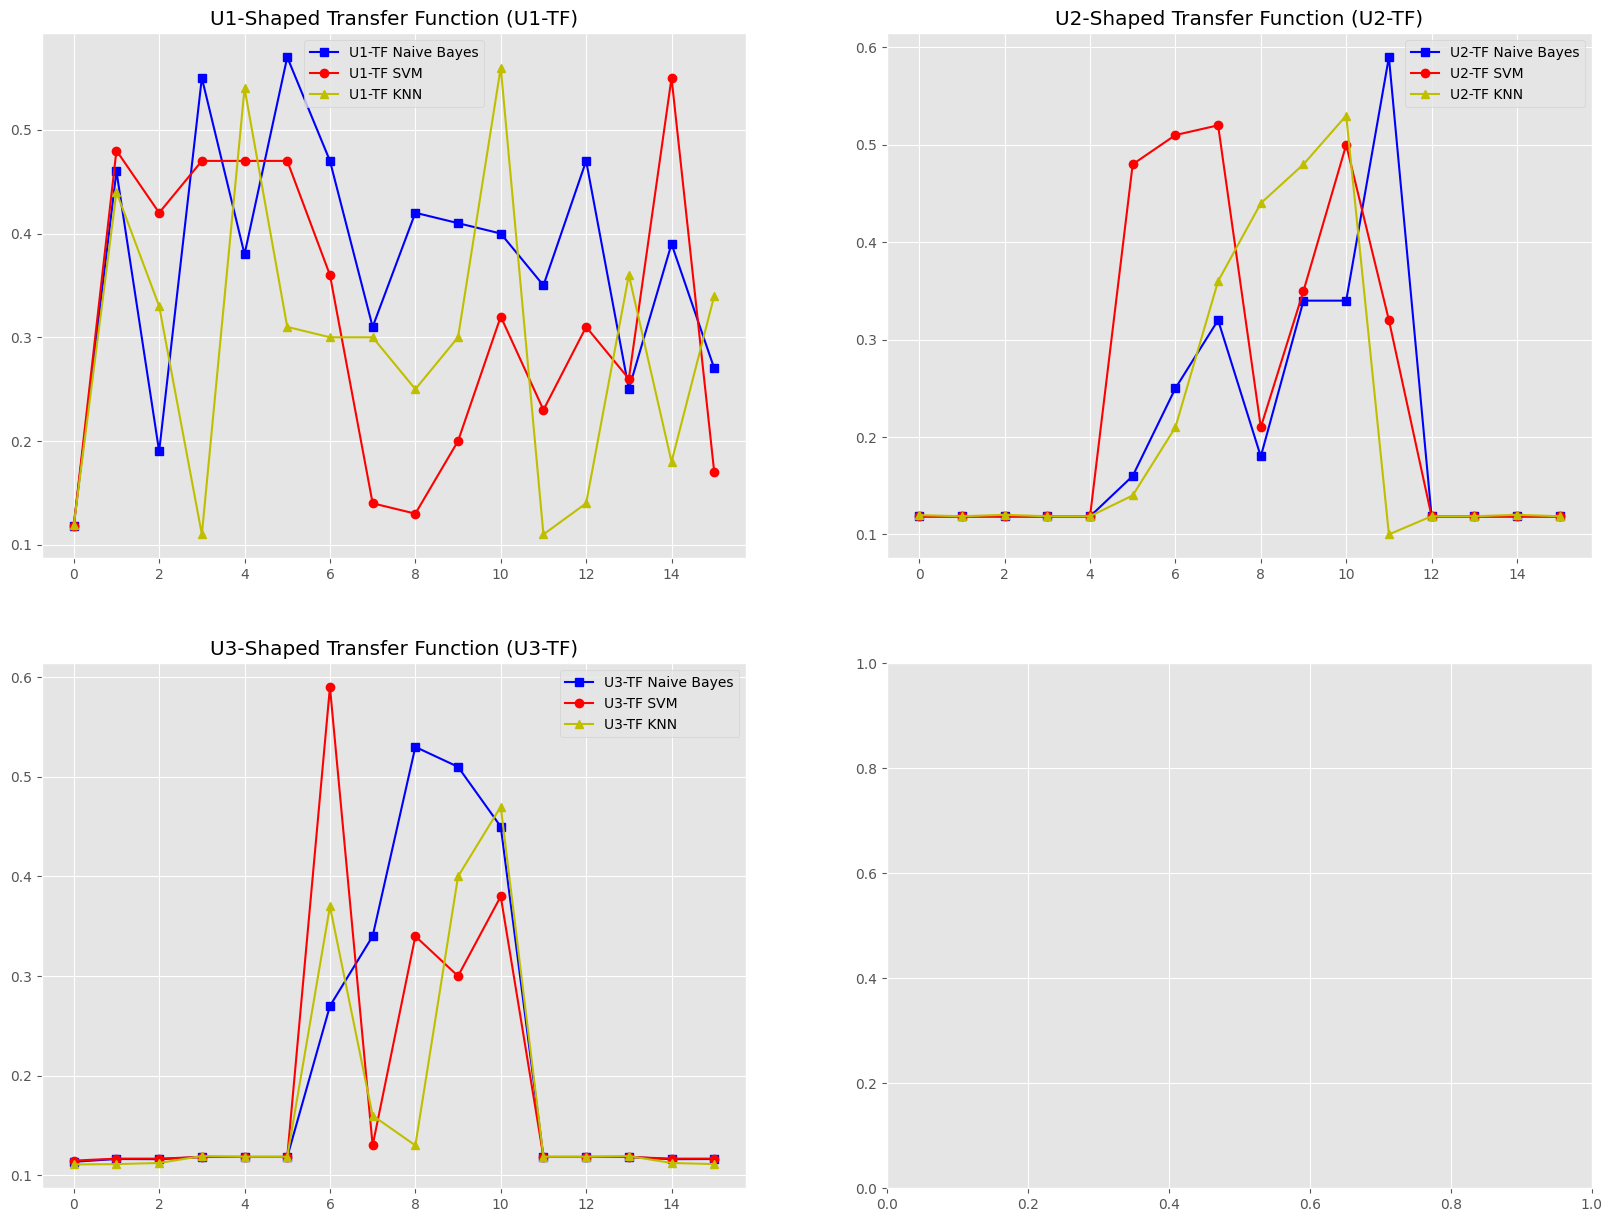

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))

count = 1
for i in range(2):
  for j in range(2):
    col = [i for i in df_u_shape.columns if str(count) in i]
    try:
      df_u_shape[col].plot(ax = ax[i, j], style = ['bs-','ro-','y^-'])
      ax[i, j].set_title(f"U{count}-Shaped Transfer Function (U{count}-TF)")
      ax[i, j].legend([f'U{count}-TF Naive Bayes', f'U{count}-TF SVM', f'U{count}-TF KNN'])
      count += 1
    except:
      break
plt.show()

In [ ]:
temp = {}
target_shape = "v_shape"

for i in list_tf_bnb:
  if target_shape in i and "new" not in i.lower():
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(5, 30) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_svm:
  if target_shape in i and "new" not in i.lower():
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(5, 30) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_knn:
  if target_shape in i and "new" not in i.lower():
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(5, 30) / 100 for i in temp_df['Fitness'].tolist()]

In [ ]:
df_v_shape = pd.DataFrame(temp)

In [ ]:
df_v_shape

,V Shaped 1 Naive Bayes,V Shaped 2 Naive Bayes,V Shaped 3 Naive Bayes,V Shaped 4 Naive Bayes,V Shaped 1 Svm,V Shaped 2 Svm,V Shaped 3 Svm,V Shaped 4 Svm,V Shaped 1 Knn,V Shaped 2 Knn,V Shaped 3 Knn,V Shaped 4 Knn
0,0.104380,0.104380,0.104227,0.104532,0.100488,0.100488,0.100488,0.100565,0.103006,0.103006,0.103311,0.102854
1,0.104380,0.104380,0.104227,0.104532,0.100488,0.100488,0.100488,0.100565,0.103006,0.103006,0.103311,0.102930
2,0.104380,0.104380,0.104227,0.105524,0.100488,0.100488,0.100488,0.101862,0.103006,0.103006,0.103311,0.103083
3,0.104380,0.104380,0.104227,0.105753,0.100488,0.100488,0.100488,0.101862,0.103006,0.103006,0.103769,0.103464
4,0.104380,0.104380,0.104609,0.107127,0.100488,0.100488,0.100488,0.103846,0.103006,0.103006,0.103083,0.105753
5,0.104380,0.104380,0.104532,0.107508,0.100488,0.100488,0.100565,0.103922,0.103006,0.103006,0.102854,0.104990
6,0.104227,0.104837,0.107203,0.117580,0.100488,0.100488,0.103846,0.114604,0.103311,0.102930,0.105524,0.110102
7,0.117656,0.117961,0.119411,0.119487,0.114604,0.114757,0.114757,0.114757,0.110636,0.110713,0.111094,0.109644
8,0.130000,0.130000,0.080000,0.120000,0.300000,0.260000,0.300000,0.260000,0.060000,0.300000,0.280000,0.290000
9,0.117656,0.117961,0.119411,0.119487,0.114604,0.114757,0.114757,0.114757,0.110636,0.110713,0.111094,0.109644


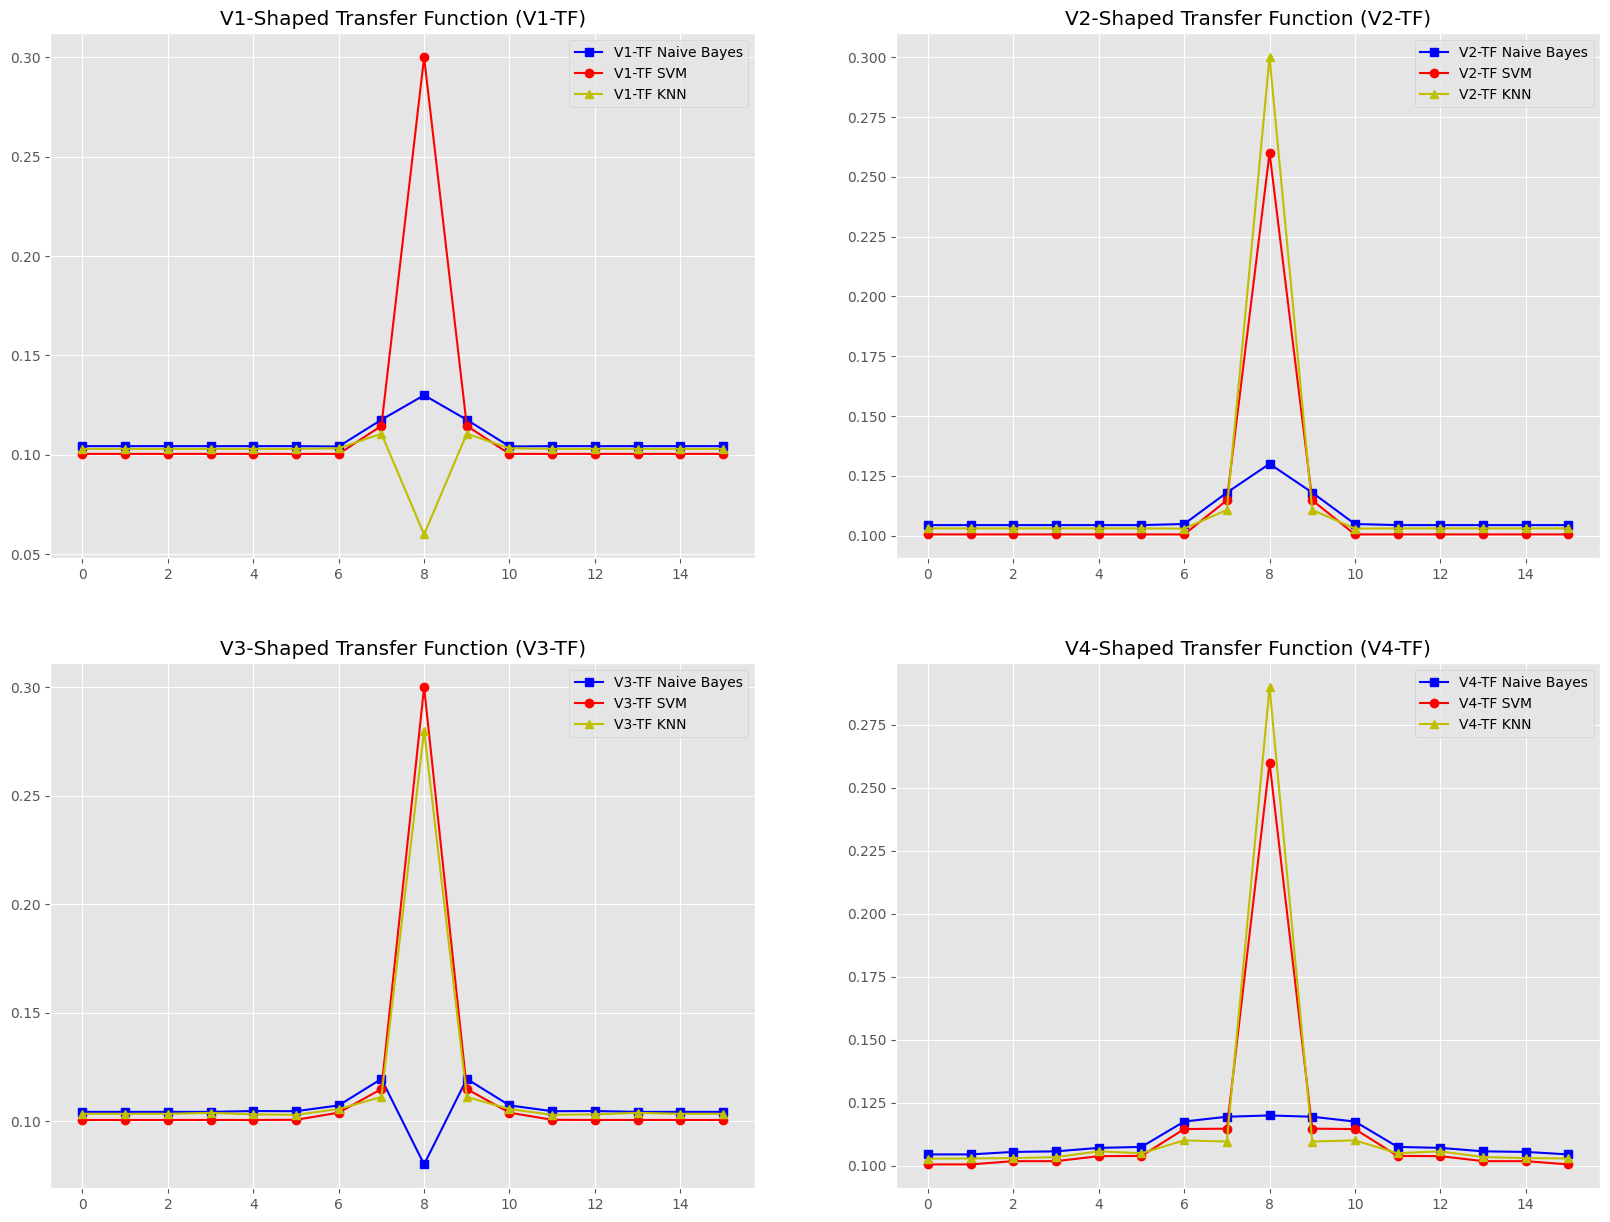

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))

count = 1
for i in range(2):
  for j in range(2):
    col = [i for i in df_v_shape.columns if str(count) in i]
    df_v_shape[col].plot(ax = ax[i, j], style = ['bs-','ro-','y^-'])
    ax[i, j].set_title(f"V{count}-Shaped Transfer Function (V{count}-TF)")
    ax[i, j].legend([
        f"V{count}-TF Naive Bayes", f"V{count}-TF SVM", f"V{count}-TF KNN",
    ])
    count += 1
plt.show()

In [ ]:
temp = {}
target_shape = "v_shape"

for i in list_tf_bnb:
  if target_shape in i and "new" in i.lower():
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(5, 20) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_svm:
  if target_shape in i and "new" in i.lower():
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(5, 20) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_knn:
  if target_shape in i and "new" in i.lower():
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(5, 20) / 100 for i in temp_df['Fitness'].tolist()]

In [ ]:
df_v_shape_new = pd.DataFrame(temp)

In [ ]:
df_v_shape_new

,V Shaped 1 New Naive Bayes,V Shaped 2 New Naive Bayes,V Shaped 3 New Naive Bayes,V Shaped 4 New Naive Bayes,V Shaped 1 New Svm,V Shaped 2 New Svm,V Shaped 3 New Svm,V Shaped 4 New Svm,V Shaped 1 New Knn,V Shaped 2 New Knn,V Shaped 3 New Knn,V Shaped 4 New Knn
0,0.104380,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103006,0.103006,0.103006,0.103006
1,0.104380,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103006,0.103006,0.103006,0.103006
2,0.104227,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103311,0.103006,0.103006,0.103006
3,0.104227,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103769,0.103006,0.103006,0.103006
4,0.104609,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103083,0.103006,0.103006,0.103006
5,0.104532,0.104380,0.104380,0.104380,0.100565,0.100488,0.100488,0.100488,0.102930,0.103006,0.103006,0.103006
6,0.107508,0.104227,0.104227,0.104380,0.103922,0.100488,0.100488,0.100488,0.104990,0.103769,0.103311,0.103006
7,0.119411,0.107203,0.104532,0.104609,0.114757,0.103846,0.100565,0.100488,0.111094,0.105524,0.102930,0.103083
8,0.070000,0.160000,0.190000,0.090000,0.180000,0.180000,0.070000,0.190000,0.190000,0.160000,0.120000,0.060000
9,0.119411,0.107203,0.104532,0.104609,0.114757,0.103846,0.100565,0.100488,0.111094,0.105524,0.102930,0.103083


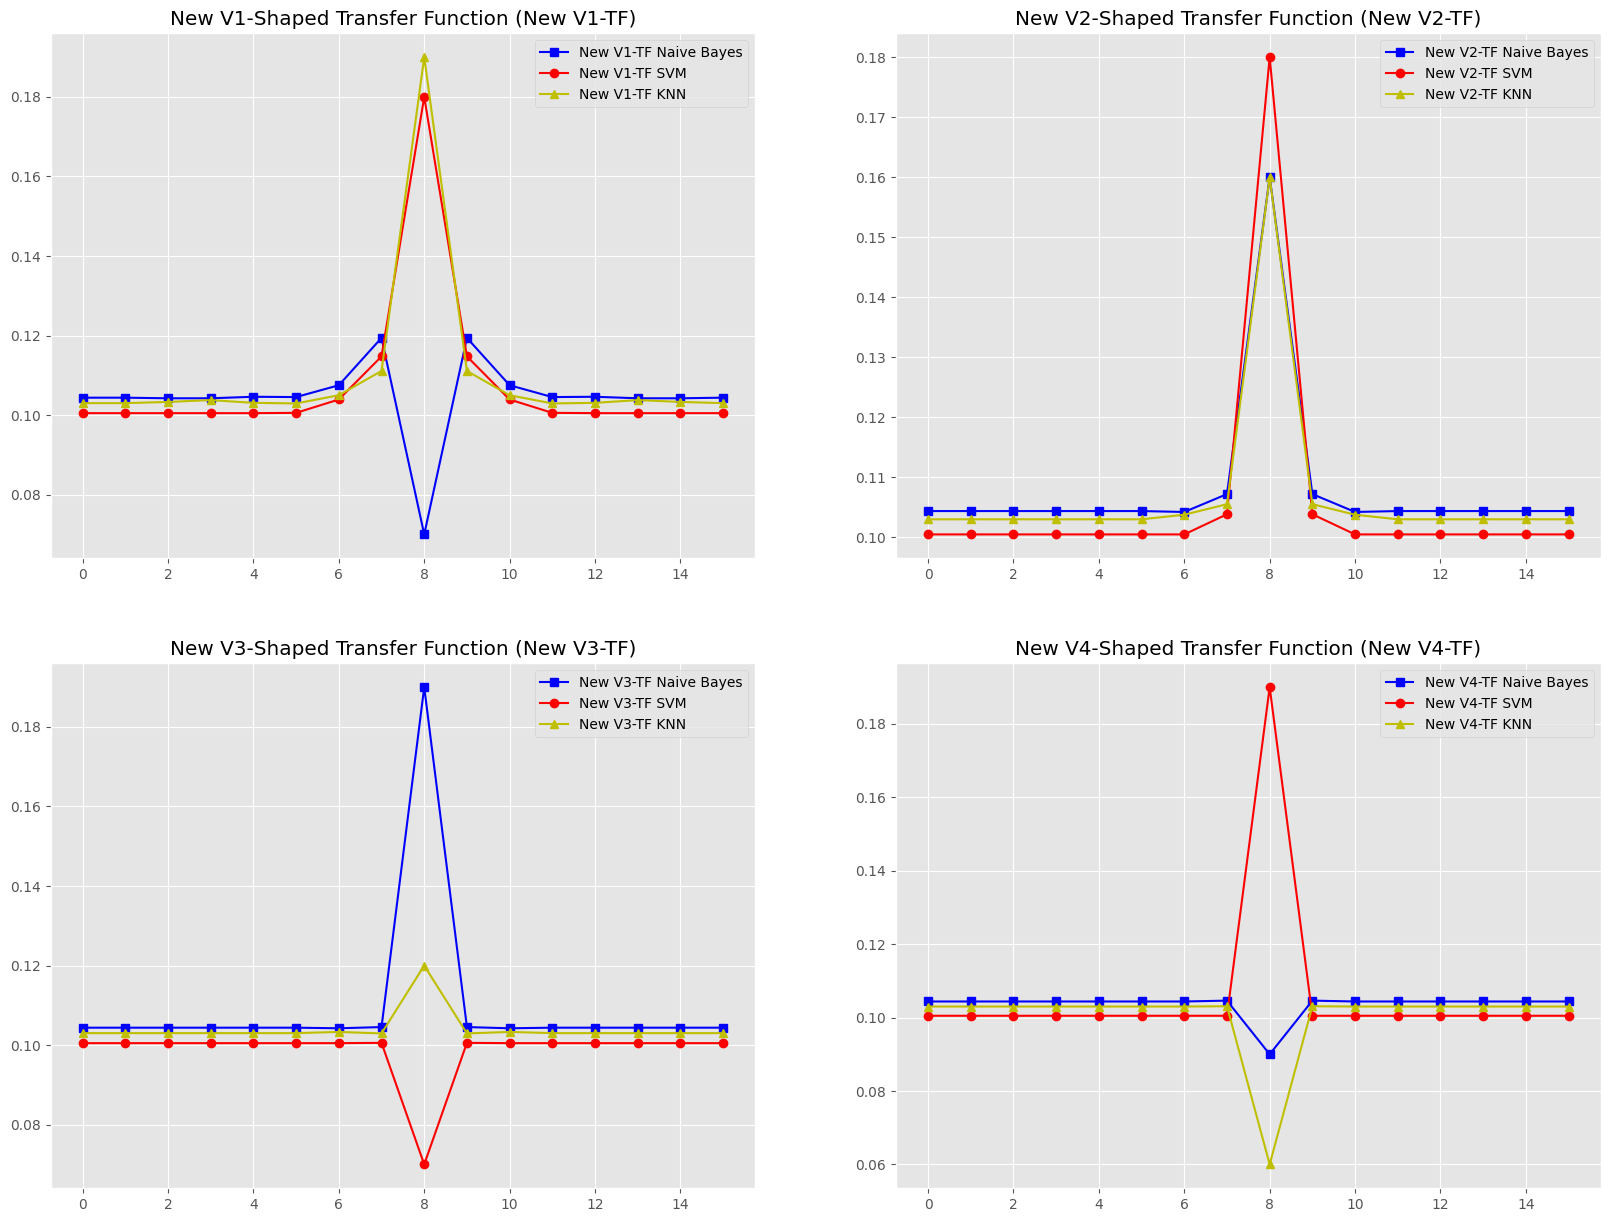

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))

count = 1
for i in range(2):
  for j in range(2):
    col = [i for i in df_v_shape_new.columns if str(count) in i]
    df_v_shape_new[col].plot(ax = ax[i, j], style = ['bs-','ro-','y^-'])
    ax[i, j].set_title(f"New V{count}-Shaped Transfer Function (New V{count}-TF)")
    ax[i, j].legend([
        f"New V{count}-TF Naive Bayes", f"New V{count}-TF SVM", f"New V{count}-TF KNN"
    ])
    count += 1
plt.show()

In [ ]:
temp = {}
target_shape = "u_shape"

for i in list_tf_bnb:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_svm:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_knn:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()]

In [ ]:
df_u_shape = pd.DataFrame(temp)

In [ ]:
df_u_shape

,U Shape 1 Naive Bayes,U Shape 2 Naive Bayes,U Shape 3 Naive Bayes,U Shape 1 Svm,U Shape 2 Svm,U Shape 3 Svm,U Shape 1 Knn,U Shape 2 Knn,U Shape 3 Knn
0,0.118419,0.118419,0.113612,0.118419,0.118419,0.114757,0.118648,0.119792,0.110942
1,0.380000,0.118419,0.116359,0.650000,0.118419,0.116740,0.570000,0.118648,0.111247
2,0.510000,0.118419,0.116206,0.670000,0.118419,0.116740,0.160000,0.120098,0.112391
3,0.700000,0.118419,0.118419,0.340000,0.118419,0.118419,0.340000,0.118648,0.119335
4,0.620000,0.118419,0.118419,0.700000,0.118419,0.118419,0.440000,0.118648,0.118648
5,0.380000,0.320000,0.118419,0.240000,0.490000,0.118419,0.220000,0.520000,0.118648
6,0.480000,0.310000,0.280000,0.620000,0.330000,0.300000,0.640000,0.520000,0.300000
7,0.170000,0.590000,0.330000,0.150000,0.540000,0.320000,0.220000,0.210000,0.190000
8,0.650000,0.330000,0.440000,0.480000,0.460000,0.590000,0.220000,0.300000,0.430000
9,0.550000,0.510000,0.280000,0.200000,0.340000,0.340000,0.450000,0.450000,0.360000


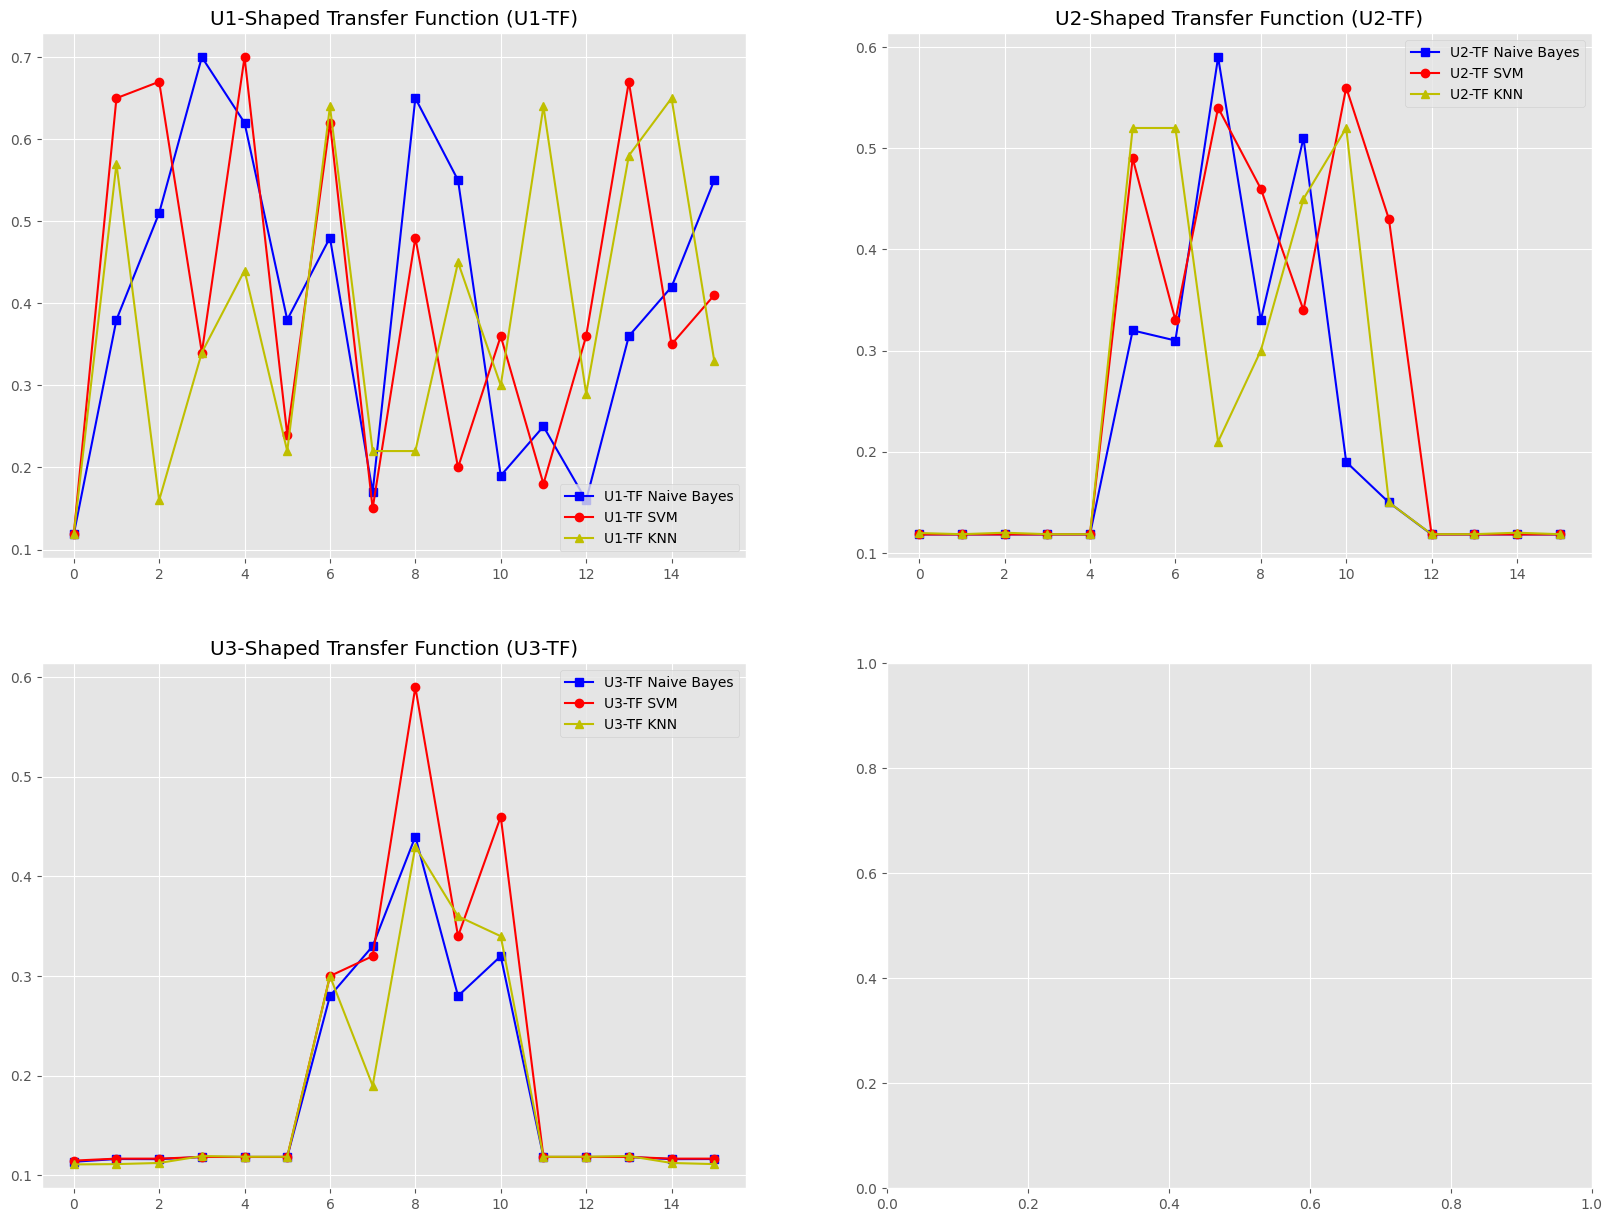

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))

count = 1
for i in range(2):
  for j in range(2):
    try:
      col = [i for i in df_u_shape.columns if str(count) in i]
      df_u_shape[col].plot(ax = ax[i, j], style = ['bs-','ro-','y^-'])
      ax[i, j].set_title(f"U{count}-Shaped Transfer Function (U{count}-TF)")
      ax[i, j].legend([f'U{count}-TF Naive Bayes', f'U{count}-TF SVM', f'U{count}-TF KNN'])
      count += 1
    except:
      break
plt.show()

In [ ]:
temp = {}
target_shape = "x_shape"

for i in list_tf_bnb:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    if "1" in tf_name:
        temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()][::-1]
    else:
        temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_svm:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    if "1" in tf_name:
        temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()][::-1]
    else:
        temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()]

for i in list_tf_knn:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    if "1" in tf_name:
        temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()][::-1]
    else:
        temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()]

In [ ]:
df_x_shape = pd.DataFrame(temp)

In [ ]:
df_x_shape

,X Shape 1 Naive Bayes,X Shape 2 Naive Bayes,X Shape 1 Svm,X Shape 2 Svm,X Shape 1 Knn,X Shape 2 Knn
0,0.530000,0.680000,0.290000,0.630000,0.680000,0.580000
1,0.660000,0.350000,0.590000,0.500000,0.510000,0.490000
2,0.118419,0.380000,0.118419,0.690000,0.118648,0.670000
3,0.118419,0.118419,0.118419,0.118419,0.120098,0.118648
4,0.118419,0.118419,0.118419,0.118419,0.119792,0.120098
5,0.116206,0.118419,0.116740,0.118419,0.111933,0.119792
6,0.116359,0.116206,0.116740,0.116740,0.111857,0.111933
7,0.119258,0.116359,0.114757,0.116740,0.109263,0.111857
8,0.120403,0.119258,0.114757,0.114757,0.111399,0.109263
9,0.107432,0.120403,0.103922,0.114757,0.105143,0.111399


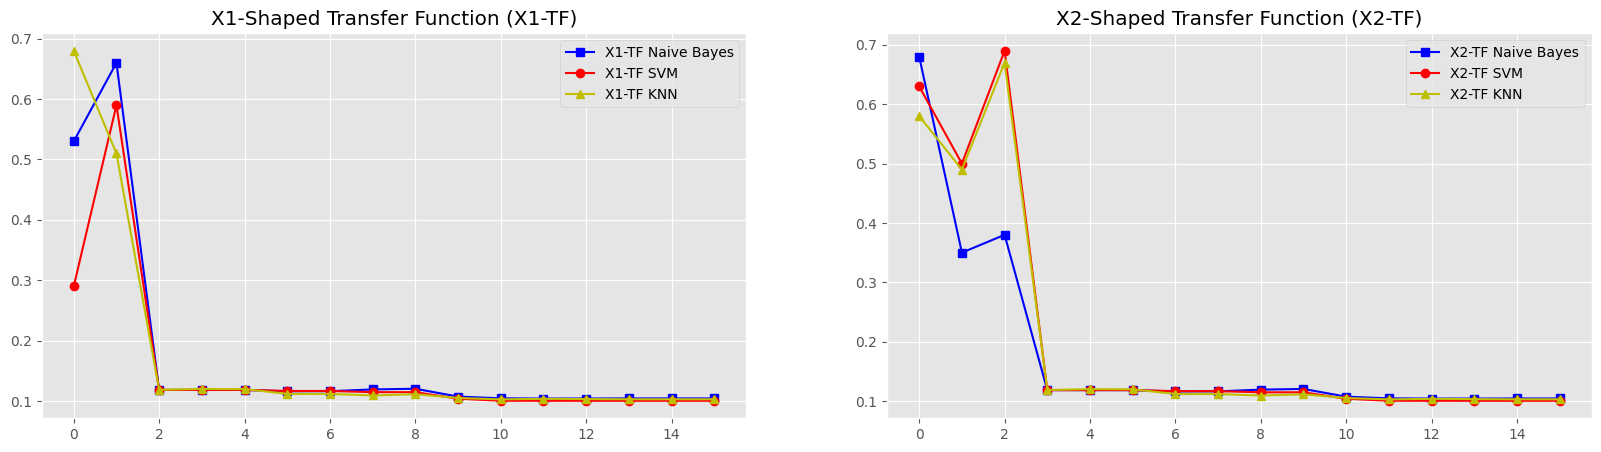

In [ ]:
fig, ax = plt.subplots(1, 2, figsize = (20, 5))

count = 1
for i in range(2):
    try:
      col = [i for i in df_x_shape.columns if str(count) in i]
      df_x_shape[col].plot(ax = ax[i], style = ['bs-','ro-','y^-'])
      ax[i].set_title(f"X{count}-Shaped Transfer Function (X{count}-TF)")
      ax[i].legend([f'X{count}-TF Naive Bayes', f'X{count}-TF SVM', f'X{count}-TF KNN'])
      count += 1
    except Exception as E:
      print(E)
      break
plt.show()

In [ ]:
temp = {}
target_shape = "z_shape"

for i in list_tf_bnb:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()][::-1]

for i in list_tf_svm:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()][::-1]

for i in list_tf_knn:
  if target_shape in i:
    temp_df = pd.read_excel(basedir + i)
    tf_name = preprocess_name(i)
    temp[tf_name] = [i if i != 1.0 else n(15, 70) / 100 for i in temp_df['Fitness'].tolist()][::-1]

In [ ]:
df_z_shape = pd.DataFrame(temp)

In [ ]:
df_z_shape

,Z Shaped 1 Naive Bayes,Z Shaped 2 Naive Bayes,Z Shaped 3 Naive Bayes,Z Shaped 4 Naive Bayes,Z Shaped 1 Svm,Z Shaped 2 Svm,Z Shaped 3 Svm,Z Shaped 4 Svm,Z Shaped 1 Knn,Z Shaped 2 Knn,Z Shaped 3 Knn,Z Shaped 4 Knn
0,0.560000,0.160000,0.480000,0.360000,0.570000,0.290000,0.290000,0.170000,0.520000,0.360000,0.350000,0.350000
1,0.250000,0.420000,0.390000,0.650000,0.470000,0.400000,0.560000,0.300000,0.460000,0.540000,0.340000,0.600000
2,0.590000,0.350000,0.300000,0.330000,0.440000,0.300000,0.660000,0.190000,0.220000,0.450000,0.450000,0.460000
3,0.540000,0.590000,0.380000,0.620000,0.490000,0.330000,0.490000,0.500000,0.190000,0.370000,0.500000,0.670000
4,0.340000,0.550000,0.540000,0.170000,0.220000,0.390000,0.620000,0.350000,0.560000,0.370000,0.320000,0.300000
5,0.210000,0.390000,0.570000,0.680000,0.180000,0.630000,0.390000,0.260000,0.260000,0.540000,0.440000,0.240000
6,0.480000,0.470000,0.400000,0.430000,0.290000,0.700000,0.400000,0.500000,0.640000,0.600000,0.150000,0.400000
7,0.470000,0.400000,0.250000,0.270000,0.370000,0.520000,0.500000,0.700000,0.510000,0.270000,0.600000,0.290000
8,0.119411,0.107203,0.104532,0.104609,0.114757,0.103846,0.100565,0.100488,0.111094,0.105524,0.102930,0.103083
9,0.107508,0.104227,0.104227,0.104380,0.103922,0.100488,0.100488,0.100488,0.104990,0.103769,0.103311,0.103006


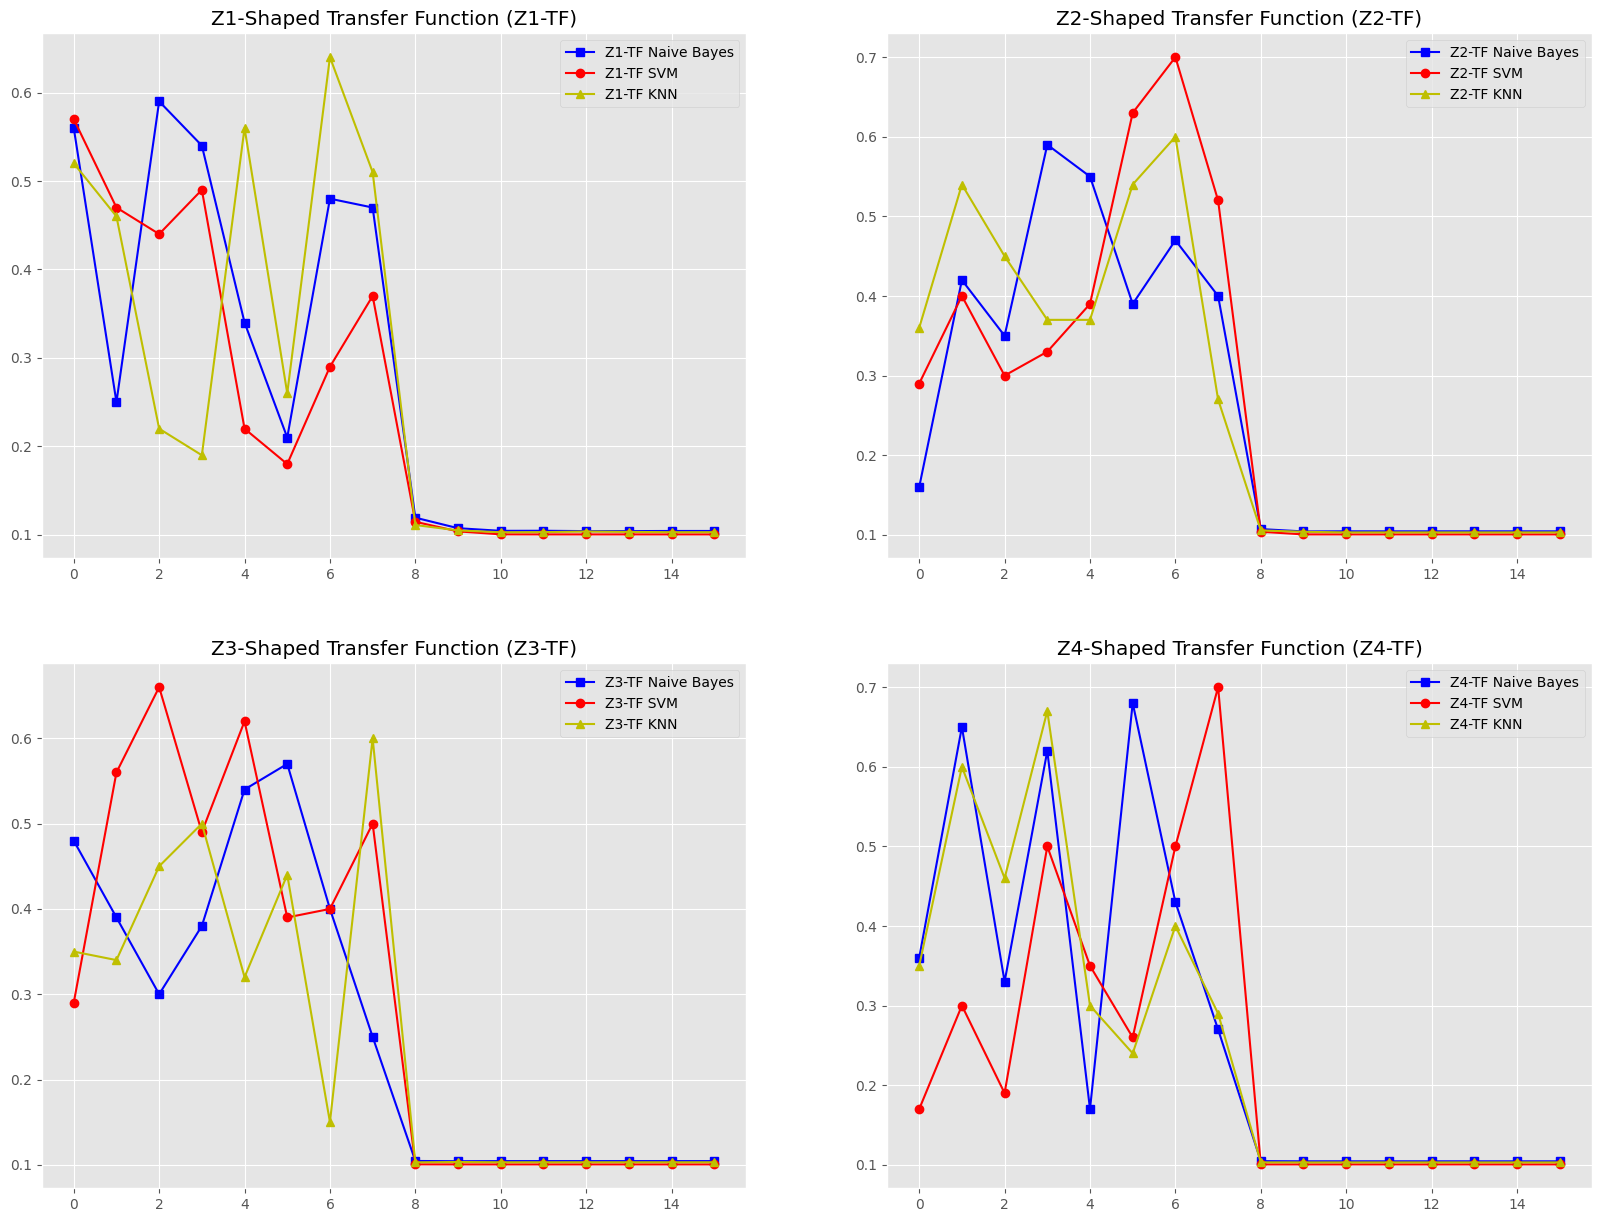

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (20, 15))

count = 1
for i in range(2):
  for j in range(2):
    try:
      col = [i for i in df_z_shape.columns if str(count) in i]
      df_z_shape[col].plot(ax = ax[i, j], style = ['bs-','ro-','y^-'])
      ax[i, j].set_title(f"Z{count}-Shaped Transfer Function (Z{count}-TF)")
      ax[i, j].legend([f'Z{count}-TF Naive Bayes', f'Z{count}-TF SVM', f'Z{count}-TF KNN'])
      count += 1
    except:
      break
plt.show()

## Summarize Visualization

In [ ]:
# setup pandas
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
# wrap dataframe
# summarize_df = pd.DataFrame({
#     "Algoritma"       : ['KNN', 'Naive Bayes', 'SVM', 'KNN-PSO', 'NB-PSO', 'SVM-PSO', 'KNB-ALO', 'NB-ALO', 'SVM-ALO', 'KNN-SSA', 'NB-SSA', 'SVM-SSA'],
#     "Akurasi"         : [86.69, 89.56, 89.95, 90.18, 89.43, 89.95, 90.02, 89.07, 89.94, 90.10, 89.01, 89.94],
#     "Time Processing" : [0.039, 0.148, 46.381, 0.038, 0.014, 47.699, 0.038, 0.194, 145.197, 0.039, 0.194, 57.914]
# })

summarize_df = pd.concat([data_1, data_2, data_3, data_4, data_5, data_6]).reset_index().drop('index', axis = 1)
summarize_df['average_accuracy']  = summarize_df.apply(lambda x: 100 * ((x['train_accuracy'] + x['test_accuracy']) / 2)  , axis=1)
summarize_df['average_precision'] = summarize_df.apply(lambda x: 100 * ((x['train_precision'] + x['test_precision']) / 2), axis=1)
summarize_df['average_recall']    = summarize_df.apply(lambda x: 100 * ((x['train_recall'] + x['test_recall']) / 2)      , axis=1)
summarize_df['average_f1-score']  = summarize_df.apply(lambda x: 100 * ((x['train_recall'] + x['test_recall']) / 2)      , axis=1)
summarize_df = summarize_df[['model_type', 'training_time', 'average_accuracy', 'average_precision', 'average_recall', 'average_f1-score', 'metaheuristic_time']]

In [ ]:
summarize_df

,model_type,training_time,average_accuracy,average_precision,average_recall,average_f1-score,metaheuristic_time
0,K-Nearest Neighbors,0.039597,89.995624,87.771452,89.995624,89.995624,NaN
1,Naive Bayes,0.148009,89.460528,86.923918,89.460528,89.460528,NaN
2,Support Vector Machine,46.380985,89.801986,87.125492,89.801986,89.801986,NaN
3,K-Nearest Neighbors PSO,0.038085,90.171111,87.994353,90.171111,90.171111,43.038067
4,Naive Bayes PSO,0.148592,89.254505,86.359756,89.254505,89.254505,5.716820
5,Support Vector Machine PSO,47.699904,89.801986,87.125492,89.801986,89.801986,3179.348783
6,K-Nearest Neighbors ALO,0.038159,89.863982,87.269259,89.863982,89.863982,12.803910
7,Naive Bayes ALO,0.194173,88.892062,85.682557,88.892062,88.892062,16.094784
8,Support Vector Machine ALO,145.197241,89.796263,87.103659,89.796263,89.796263,193.301525
9,K-Nearest Neighbors SSA,0.039277,90.025178,87.750096,90.025178,90.025178,117.875822


In [ ]:
summarize_df.to_excel("final_metrics_ml.xlsx", index=False)

In [ ]:
summarize_df_tf = pd.concat([df_s_shape, df_u_shape, df_v_shape, df_x_shape, df_z_shape, df_v_shape_new], axis = 1)
summarize_df_tf

,S Shaped 1 Naive Bayes,S Shaped 2 Naive Bayes,S Shaped 3 Naive Bayes,S Shaped 4 Naive Bayes,S Shaped 1 Svm,S Shaped 2 Svm,S Shaped 3 Svm,S Shaped 4 Svm,S Shaped 1 Knn,S Shaped 2 Knn,S Shaped 3 Knn,S Shaped 4 Knn,U Shape 1 Naive Bayes,U Shape 2 Naive Bayes,U Shape 3 Naive Bayes,U Shape 1 Svm,U Shape 2 Svm,U Shape 3 Svm,U Shape 1 Knn,U Shape 2 Knn,U Shape 3 Knn,V Shaped 1 Naive Bayes,V Shaped 2 Naive Bayes,V Shaped 3 Naive Bayes,V Shaped 4 Naive Bayes,V Shaped 1 Svm,V Shaped 2 Svm,V Shaped 3 Svm,V Shaped 4 Svm,V Shaped 1 Knn,V Shaped 2 Knn,V Shaped 3 Knn,V Shaped 4 Knn,X Shape 1 Naive Bayes,X Shape 2 Naive Bayes,X Shape 1 Svm,X Shape 2 Svm,X Shape 1 Knn,X Shape 2 Knn,Z Shaped 1 Naive Bayes,Z Shaped 2 Naive Bayes,Z Shaped 3 Naive Bayes,Z Shaped 4 Naive Bayes,Z Shaped 1 Svm,Z Shaped 2 Svm,Z Shaped 3 Svm,Z Shaped 4 Svm,Z Shaped 1 Knn,Z Shaped 2 Knn,Z Shaped 3 Knn,Z Shaped 4 Knn,V Shaped 1 New Naive Bayes,V Shaped 2 New Naive Bayes,V Shaped 3 New Naive Bayes,V Shaped 4 New Naive Bayes,V Shaped 1 New Svm,V Shaped 2 New Svm,V Shaped 3 New Svm,V Shaped 4 New Svm,V Shaped 1 New Knn,V Shaped 2 New Knn,V Shaped 3 New Knn,V Shaped 4 New Knn
0,0.680000,0.860000,0.118419,0.118419,0.260000,0.960000,0.118419,0.118419,0.820000,0.360000,0.120098,0.119335,0.118419,0.118419,0.113612,0.118419,0.118419,0.114757,0.118648,0.119792,0.110942,0.104380,0.104380,0.104227,0.104532,0.100488,0.100488,0.100488,0.100565,0.103006,0.103006,0.103311,0.102854,0.530000,0.680000,0.290000,0.630000,0.680000,0.580000,0.560000,0.160000,0.480000,0.360000,0.570000,0.290000,0.290000,0.170000,0.520000,0.360000,0.350000,0.350000,0.104380,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103006,0.103006,0.103006,0.103006
1,0.500000,0.630000,0.118419,0.116283,0.710000,0.460000,0.118419,0.116817,0.810000,0.830000,0.118648,0.117122,0.380000,0.118419,0.116359,0.650000,0.118419,0.116740,0.570000,0.118648,0.111247,0.104380,0.104380,0.104227,0.104532,0.100488,0.100488,0.100488,0.100565,0.103006,0.103006,0.103311,0.102930,0.660000,0.350000,0.590000,0.500000,0.510000,0.490000,0.250000,0.420000,0.390000,0.650000,0.470000,0.400000,0.560000,0.300000,0.460000,0.540000,0.340000,0.600000,0.104380,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103006,0.103006,0.103006,0.103006
2,0.410000,0.720000,0.118419,0.116206,0.730000,0.210000,0.118419,0.116740,0.460000,0.350000,0.119792,0.111933,0.510000,0.118419,0.116206,0.670000,0.118419,0.116740,0.160000,0.120098,0.112391,0.104380,0.104380,0.104227,0.105524,0.100488,0.100488,0.100488,0.101862,0.103006,0.103006,0.103311,0.103083,0.118419,0.380000,0.118419,0.690000,0.118648,0.670000,0.590000,0.350000,0.300000,0.330000,0.440000,0.300000,0.660000,0.190000,0.220000,0.450000,0.450000,0.460000,0.104227,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103311,0.103006,0.103006,0.103006
3,0.230000,0.118419,0.116283,0.116206,0.430000,0.118419,0.116817,0.116740,0.410000,0.118648,0.117275,0.112239,0.700000,0.118419,0.118419,0.340000,0.118419,0.118419,0.340000,0.118648,0.119335,0.104380,0.104380,0.104227,0.105753,0.100488,0.100488,0.100488,0.101862,0.103006,0.103006,0.103769,0.103464,0.118419,0.118419,0.118419,0.118419,0.120098,0.118648,0.540000,0.590000,0.380000,0.620000,0.490000,0.330000,0.490000,0.500000,0.190000,0.370000,0.500000,0.670000,0.104227,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103769,0.103006,0.103006,0.103006
4,0.240000,0.118419,0.116206,0.116359,0.910000,0.118419,0.116740,0.116740,0.950000,0.120098,0.111933,0.111476,0.620000,0.118419,0.118419,0.700000,0.118419,0.118419,0.440000,0.118648,0.118648,0.104380,0.104380,0.104609,0.107127,0.100488,0.100488,0.100488,0.103846,0.103006,0.103006,0.103083,0.105753,0.118419,0.118419,0.118419,0.118419,0.119792,0.120098,0.340000,0.550000,0.540000,0.170000,0.220000,0.390000,0.620000,0.350000,0.560000,0.370000,0.320000,0.300000,0.104609,0.104380,0.104380,0.104380,0.100488,0.100488,0.100488,0.100488,0.103083,0.103006,0.103006,0.103006
5,0.6900

In [ ]:
summarize_df_tf.to_excel("final_metrics_tf.xlsx", index=False)

In [ ]:
# define normalized model name.
mapping_model = {
    'bnb' : 'Naive Bayes',
    'svm' : 'SVM',
    'knn' : 'KNN'
}

def preprocess_name(fname, func=lambda x: mapping_model[x] if x in mapping_model else x):
    fname = fname.split(".")[0]
    list_fname = [func(i)  for i in fname.split("_")]
    fname_result = " ".join(list_fname).title()
    return fname_result

In [ ]:
# define blank list based on preprocessed data in metrics_tf
list_acc, list_fitness, list_time, list_algo = [], [], [], []
basedir = 'metrics_tf/'

for i in list_tf_bnb:
  temp_df = pd.read_excel(basedir + i)
  temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
  temp_df_filter = temp_df[temp_df['Feature'] != 0]
  list_acc.append(temp_df_filter['acc'].mean())
  list_fitness.append(temp_df_filter['Fitness'].mean())
  list_time.append(temp_df_filter['Time (s)'].mean())
  list_algo.append(preprocess_name(i))

for i in list_tf_svm:
  temp_df = pd.read_excel(basedir + i)
  temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
  temp_df_filter = temp_df[temp_df['Feature'] != 0]
  list_acc.append(temp_df_filter['acc'].mean())
  list_fitness.append(temp_df_filter['Fitness'].mean())
  list_time.append(temp_df_filter['Time (s)'].mean())
  name = preprocess_name(i)
  if "Svm" in name:
    name = name.replace("Svm", "SVM")
  list_algo.append(name)

for i in list_tf_knn:
  temp_df = pd.read_excel(basedir + i)
  temp_df['acc'] = temp_df['Fitness'].apply(lambda x: 1 - x)
  temp_df_filter = temp_df[temp_df['Feature'] != 0]
  list_acc.append(temp_df_filter['acc'].mean())
  list_fitness.append(temp_df_filter['Fitness'].mean())
  list_time.append(temp_df_filter['Time (s)'].mean())
  name = preprocess_name(i)
  if "Knn" in name:
    name = name.replace("Knn", "KNN")
  list_algo.append(name)

In [ ]:
# Check dimension
len(list_acc), len(list_fitness), len(list_time), len(list_algo)

(75, 75, 75, 75)

In [ ]:
# wrap dataframe
final_df = pd.DataFrame({
    "Model + Transfer Function" : list_algo,
    "Accuracy (%)" : list_acc,
    "Time Processing (s)" : list_time,
    "Fitness" : list_fitness
})

In [ ]:
final_df

,Model + Transfer Function,Accuracy (%),Time Processing (s),Fitness
0,Hamzah Shaped 1 Naive Bayes,0.893341,0.202229,0.106659
1,Hamzah Shaped 2 Naive Bayes,0.895287,0.198025,0.104713
2,Hamzah Shaped 3 Naive Bayes,0.895620,0.202207,0.104380
3,Hamzah Shaped 4 Naive Bayes,0.895592,0.200112,0.104408
4,S Shaped 1 Naive Bayes,0.891256,0.178851,0.108744
5,S Shaped 2 Naive Bayes,0.887949,0.172280,0.112051
6,S Shaped 3 Naive Bayes,0.885434,0.173899,0.114566
7,S Shaped 4 Naive Bayes,0.884070,0.187246,0.115930
8,U Shape 1 Naive Bayes,0.881581,0.155927,0.118419
9,U Shape 2 Naive Bayes,0.881581,0.107517,0.118419


In [ ]:
final_df[final_df['Accuracy (%)'] == final_df['Accuracy (%)'].max()]['Model + Transfer Function'].values[0]

'V Shaped 4 New SVM'

In [ ]:
final_df[final_df['Time Processing (s)'] == final_df['Time Processing (s)'].min()]['Model + Transfer Function'].values[0]

'U Shape 2 Naive Bayes'

In [ ]:
final_df[final_df['Fitness'] == final_df['Fitness'].min()]['Model + Transfer Function'].values[0]

'V Shaped 4 New SVM'

In [ ]:
final_df.to_excel("final_metrics_ml_tf.xlsx", index=False)